In [3]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("data/HDB_Prices/HDB/resale-flat-prices-based-on-approval-date-1990-1999.csv")
df2 = pd.read_csv("data/HDB_Prices/HDB/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
df3 = pd.read_csv("data/HDB_Prices/HDB/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
df4 = pd.read_csv("data/HDB_Prices/HDB/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
df5 = pd.read_csv("data/HDB_Prices/HDB/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

In [4]:
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
df['year'] = df['month'].apply(lambda x: int(x[0:4]))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826581 entries, 0 to 80373
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                826581 non-null  object 
 1   town                 826581 non-null  object 
 2   flat_type            826581 non-null  object 
 3   block                826581 non-null  object 
 4   street_name          826581 non-null  object 
 5   storey_range         826581 non-null  object 
 6   floor_area_sqm       826581 non-null  float64
 7   flat_model           826581 non-null  object 
 8   lease_commence_date  826581 non-null  int64  
 9   resale_price         826581 non-null  float64
 10  remaining_lease      117527 non-null  object 
 11  year                 826581 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 82.0+ MB


In [7]:
df.describe()

floor_area_sqm  lease_commence_date  resale_price           year
count   826581.000000        826581.000000  8.265810e+05  826581.000000
mean        95.557909          1987.149345  2.935490e+05    2004.234957
std         26.057093             9.451743  1.487536e+05       7.926336
min         28.000000          1966.000000  5.000000e+03    1990.000000
25%         73.000000          1980.000000  1.810000e+05    1998.000000
50%         93.000000          1986.000000  2.750000e+05    2003.000000
75%        114.000000          1994.000000  3.830000e+05    2010.000000
max        307.000000          2019.000000  1.258000e+06    2020.000000

### check unique values

In [6]:
for i in df.columns:
    print ('unique values for', i)
    print ('value counts', df[i].value_counts())
    print(df[i].unique())

unique values for month
value counts month
1999-03    6468
1999-06    5862
1998-10    5709
1999-04    5698
1999-05    5671
           ... 
1991-02     816
1990-10     810
1990-05     778
2020-04     424
2020-05     363
Name: count, Length: 369, dtype: int64
['1990-01' '1990-02' '1990-03' '1990-04' '1990-05' '1990-06' '1990-07'
 '1990-08' '1990-09' '1990-10' '1990-11' '1990-12' '1991-01' '1991-02'
 '1991-03' '1991-04' '1991-05' '1991-06' '1991-07' '1991-08' '1991-09'
 '1991-10' '1991-11' '1991-12' '1992-01' '1992-02' '1992-03' '1992-04'
 '1992-05' '1992-06' '1992-07' '1992-08' '1992-09' '1992-10' '1992-11'
 '1992-12' '1993-01' '1993-02' '1993-03' '1993-04' '1993-05' '1993-06'
 '1993-07' '1993-08' '1993-09' '1993-10' '1993-11' '1993-12' '1994-01'
 '1994-02' '1994-03' '1994-04' '1994-05' '1994-06' '1994-07' '1994-08'
 '1994-09' '1994-10' '1994-11' '1994-12' '1995-01' '1995-02' '1995-03'
 '1995-04' '1995-05' '1995-06' '1995-07' '1995-08' '1995-09' '1995-10'
 '1995-11' '1995-12' '1996-01' '

value counts storey_range
04 TO 06    209705
07 TO 09    189109
01 TO 03    168985
10 TO 12    160250
13 TO 15     52212
16 TO 18     19449
19 TO 21      9422
22 TO 24      6053
01 TO 05      2700
25 TO 27      2544
06 TO 10      2474
11 TO 15      1259
28 TO 30      1049
34 TO 36       267
31 TO 33       265
16 TO 20       265
37 TO 39       255
40 TO 42       132
21 TO 25        92
26 TO 30        39
46 TO 48        21
43 TO 45        16
49 TO 51         9
36 TO 40         7
31 TO 35         2
Name: count, dtype: int64
['10 TO 12' '04 TO 06' '07 TO 09' '01 TO 03' '13 TO 15' '19 TO 21'
 '16 TO 18' '25 TO 27' '22 TO 24' '28 TO 30' '31 TO 33' '40 TO 42'
 '37 TO 39' '34 TO 36' '06 TO 10' '01 TO 05' '11 TO 15' '16 TO 20'
 '21 TO 25' '26 TO 30' '36 TO 40' '31 TO 35' '46 TO 48' '43 TO 45'
 '49 TO 51']
unique values for floor_area_sqm
value counts floor_area_sqm
67.0     63493
104.0    43982
68.0     35333
84.0     33878
121.0    27139
         ...  
75.9         1
69.2         1
152.4      

In [8]:
import re
import numpy as np
import pandas as pd

def calculate_remaining_lease(x):
    if pd.isna(x):
        return np.nan

    s = str(x).strip()   

    # "66 years 03 months"
    m = re.search(r'(\d+)\s*years?\s*(\d+)\s*months?', s, flags=re.IGNORECASE)
    if m:
        years = int(m.group(1))
        months = int(m.group(2))
        return years + months / 12

    # "66 years"
    m = re.search(r'(\d+)\s*years', s, flags=re.IGNORECASE)
    if m:
        years = int(m.group(1))
        return float(years)
    # "66"
    m = re.search(r'(\d+)', s, flags=re.IGNORECASE)
    if m:
        years = int(m.group(1))
        return float(years)

    return np.nan
df['remaining_lease_years'] = df['remaining_lease'].apply(calculate_remaining_lease)

df['calculated_remaining'] = df['lease_commence_date'] + 99 - df['year'] + 0.5
df['remaining_lease_years'] = df['remaining_lease_years'].fillna(df['calculated_remaining'])
df.drop(columns = ['calculated_remaining','remaining_lease'], inplace= True)

In [9]:
#adjust for inflation
'''
https://www.hdb.gov.sg/-/media/doc/EAPG-CSC/3Q2025-RPI-Table_v2.pdf

As the transaction data spans up to September 2020, 
resale prices were adjusted to constant 2020 prices using the HDB Resale Price Index. 
This avoids extrapolating inflation beyond the observed data period while allowing comparison of real prices across time.

'''
rpi_df = pd.read_csv("data/rpi.csv")
rpi_df

df['month'] = pd.to_datetime(df['month'], errors= 'coerce')
df['quarter'] = df['month'].dt.to_period('Q').astype(str)
df['quarter'] = df['quarter'].str[-2:]  

#merge the rpi data to original df
df = df.merge(
    rpi_df,
    on=['year', 'quarter'],
    how='left'
)
df[['year', 'quarter', 'rpi']].isna().sum()


base_rpi = rpi_df.query(
    "year == 2020 and quarter == 'Q3'"
)['rpi'].iloc[0]


df['adjusted_price'] = (
    df['resale_price'] * base_rpi / df['rpi']
)

df['adjusted_price_psm'] = (
    df['adjusted_price'] / df['floor_area_sqm']
)


In [10]:
df

month        town  flat_type block       street_name storey_range  \
0      1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1      1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2      1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3      1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4      1990-01-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...           ...         ...        ...   ...               ...          ...   
826576 2020-09-01      YISHUN     5 ROOM   716      YISHUN ST 71     07 TO 09   
826577 2020-09-01      YISHUN     5 ROOM   760      YISHUN ST 72     07 TO 09   
826578 2020-09-01      YISHUN     5 ROOM   835      YISHUN ST 81     04 TO 06   
826579 2020-09-01      YISHUN  EXECUTIVE   791      YISHUN AVE 2     04 TO 06   
826580 2020-09-01      YISHUN  EXECUTIVE   387    YISHUN RING RD     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
826576           131.0        Improved                 1987      440000.0   
826577           122.0        Improved                 1987      458000.0   
826578           122.0        Improved                 1987      490000.0   
826579           146.0      Maisonette                 1987      558000.0   
826580           146.0      Maisonette                 1988      555000.0   

        year  remaining_lease_years quarter    rpi  adjusted_price  \
0       1990              86.500000      Q1   24.3    49592.592593   
1       1990              86.500000      Q1   24.3    33061.728395   
2       1990              86.500000      Q1   24.3    44082.304527   
3       1990              86.500000      Q1   24.3    33061.728395   
4       1990              85.500000      Q1   24.3   260085.596708   
...      ...                    ...     ...    ...             ...   
826576  2020              66.250000      Q3  133.9   440000.000000   
826577  2020              65.500000      Q3  133.9   458000.000000   
826578  2020              66.333333      Q3  133.9   490000.000000   
826579  2020              66.250000      Q3  133.9   558000.000000   
826580  2020              66.750000      Q3  133.9   555000.000000   

        adjusted_price_psm  
0              1599.761051  
1              1066.507368  
2              1422.009823  
3              1066.507368  
4              3562.816393  
...                    ...  
826576         3358.778626  
826577         3754.098361  
826578         4016.393443  
826579         3821.917808  
826580         3801.369863  

[826581 rows x 16 columns]

In [11]:
df.storey_range.value_counts()

storey_range
04 TO 06    209705
07 TO 09    189109
01 TO 03    168985
10 TO 12    160250
13 TO 15     52212
16 TO 18     19449
19 TO 21      9422
22 TO 24      6053
01 TO 05      2700
25 TO 27      2544
06 TO 10      2474
11 TO 15      1259
28 TO 30      1049
34 TO 36       267
31 TO 33       265
16 TO 20       265
37 TO 39       255
40 TO 42       132
21 TO 25        92
26 TO 30        39
46 TO 48        21
43 TO 45        16
49 TO 51         9
36 TO 40         7
31 TO 35         2
Name: count, dtype: int64

In [12]:
#  map storey Storey range is converted into a continuous numerical feature using the midpoint of the range to preserve its ordinal and quantitative nature.
import re

def storey_to_mid(storey_range):
    if pd.isna(storey_range):
        return None
    nums = re.findall(r'\d+', storey_range)
    nums = list(map(int, nums))
    if len(nums) == 2:
        return (nums[0] + nums[1]) // 2
    return None

df['storey_mid'] = df['storey_range'].apply(storey_to_mid)
df.storey_mid.unique()

array([11,  5,  8,  2, 14, 20, 17, 26, 23, 29, 32, 41, 38, 35,  3, 13, 18,
       28, 33, 47, 44, 50], dtype=int64)

In [13]:
#  data cleaning to clean inconsitency in flat_type and flat_model

df['flat_type'] =df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')

''' 
Map variants like such as 2-ROOM, 2-room to same format
IMPROVED, Improved
MODEL A, Model A
MODEL A-MAISONETTE, Model A-Maisonette

'''

df['flat_model'] = (
    df['flat_model']
      .str.strip()
      .str.upper()
)

FLAT_MODEL_MAP = {
    # 2-room variants
    '2-ROOM': '2 ROOM',
    '2 ROOM': '2 ROOM',

    # Model A variants
    'MODEL A': 'MODEL A',
    'MODEL A2': 'MODEL A',
    'MODEL A-MAISONETTE': 'MODEL A MAISONETTE',

    # Improved variants
    'IMPROVED': 'IMPROVED',
    'IMPROVED-MAISONETTE': 'IMPROVED MAISONETTE',

    # Capitalization duplicates
    'NEW GENERATION': 'NEW GENERATION',
    'SIMPLIFIED': 'SIMPLIFIED',
    'STANDARD': 'STANDARD',

    # Apartment / premium
    'APARTMENT': 'APARTMENT',
    'PREMIUM APARTMENT': 'PREMIUM APARTMENT',
    'PREMIUM APARTMENT LOFT': 'PREMIUM APARTMENT LOFT',

    # Maisonette
    'MAISONETTE': 'MAISONETTE',
    'PREMIUM MAISONETTE': 'PREMIUM MAISONETTE',

    # Others
    'MULTI GENERATION': 'MULTI GENERATION',
    'TERRACE': 'TERRACE',
    'DBSS': 'DBSS',
    'TYPE S1': 'TYPE S',
    'TYPE S2': 'TYPE S',
    'ADJOINED FLAT': 'ADJOINED FLAT'
}


df['flat_model'] = df['flat_model'].map(
    lambda x: FLAT_MODEL_MAP.get(x, x)
)

In [14]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2 ROOM', 'IMPROVED MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE', 'DBSS',
       'TYPE S', 'PREMIUM APARTMENT LOFT'], dtype=object)

In [15]:
flat_type_model_counts = (
    df
    .groupby(['flat_type', 'flat_model'])
    .size()
    .reset_index(name='count')
    .sort_values(['flat_type', 'count'], ascending=[True, False])
)
flat_type_model_counts

flat_type              flat_model   count
0             1 ROOM                IMPROVED    1273
6             2 ROOM                STANDARD    6462
3             2 ROOM                IMPROVED    2523
4             2 ROOM                 MODEL A     789
5             2 ROOM       PREMIUM APARTMENT      48
1             2 ROOM                  2 ROOM      40
2             2 ROOM                    DBSS       1
11            3 ROOM          NEW GENERATION  116017
9             3 ROOM                IMPROVED   75806
10            3 ROOM                 MODEL A   46664
14            3 ROOM                STANDARD   19832
13            3 ROOM              SIMPLIFIED   13159
15            3 ROOM                 TERRACE     579
12            3 ROOM       PREMIUM APARTMENT     365
8             3 ROOM                    DBSS     156
7             3 ROOM           ADJOINED FLAT       2
19            4 ROOM                 MODEL A  174656
20            4 ROOM          NEW GENERATION   61553
23            4 ROOM              SIMPLIFIED   40801
21            4 ROOM       PREMIUM APARTMENT   17134
18            4 ROOM                IMPROVED   13476
24            4 ROOM                STANDARD     629
17            4 ROOM                    DBSS     549
26            4 ROOM                  TYPE S     272
16            4 ROOM           ADJOINED FLAT     164
25            4 ROOM                 TERRACE      63
22            4 ROOM  PREMIUM APARTMENT LOFT      17
29            5 ROOM                IMPROVED  124278
31            5 ROOM                 MODEL A   15389
33            5 ROOM       PREMIUM APARTMENT   14159
35            5 ROOM                STANDARD   12931
32            5 ROOM      MODEL A MAISONETTE    1889
28            5 ROOM                    DBSS     903
27            5 ROOM           ADJOINED FLAT     602
36            5 ROOM                  TYPE S     129
30            5 ROOM     IMPROVED MAISONETTE     114
34            5 ROOM  PREMIUM APARTMENT LOFT      14
38         EXECUTIVE               APARTMENT   32004
39         EXECUTIVE              MAISONETTE   26909
40         EXECUTIVE       PREMIUM APARTMENT    3329
37         EXECUTIVE           ADJOINED FLAT     317
41         EXECUTIVE      PREMIUM MAISONETTE      82
42  MULTI GENERATION        MULTI GENERATION     502

In [16]:
flat_counts_by_town = (
    df
    .groupby(['town'])
    .size()
    .reset_index(name='number_of_listing_count')
    .sort_values(['number_of_listing_count'], ascending=[False])
)
flat_counts_by_town.head(10)

town  number_of_listing_count
23       TAMPINES                    73101
26         YISHUN                    63309
1           BEDOK                    61400
13    JURONG WEST                    60708
25      WOODLANDS                    58735
0      ANG MO KIO                    48237
11        HOUGANG                    45476
3     BUKIT BATOK                    40444
8   CHOA CHU KANG                    33388
4     BUKIT MERAH                    30518

<Figure size 1400x800 with 0 Axes>

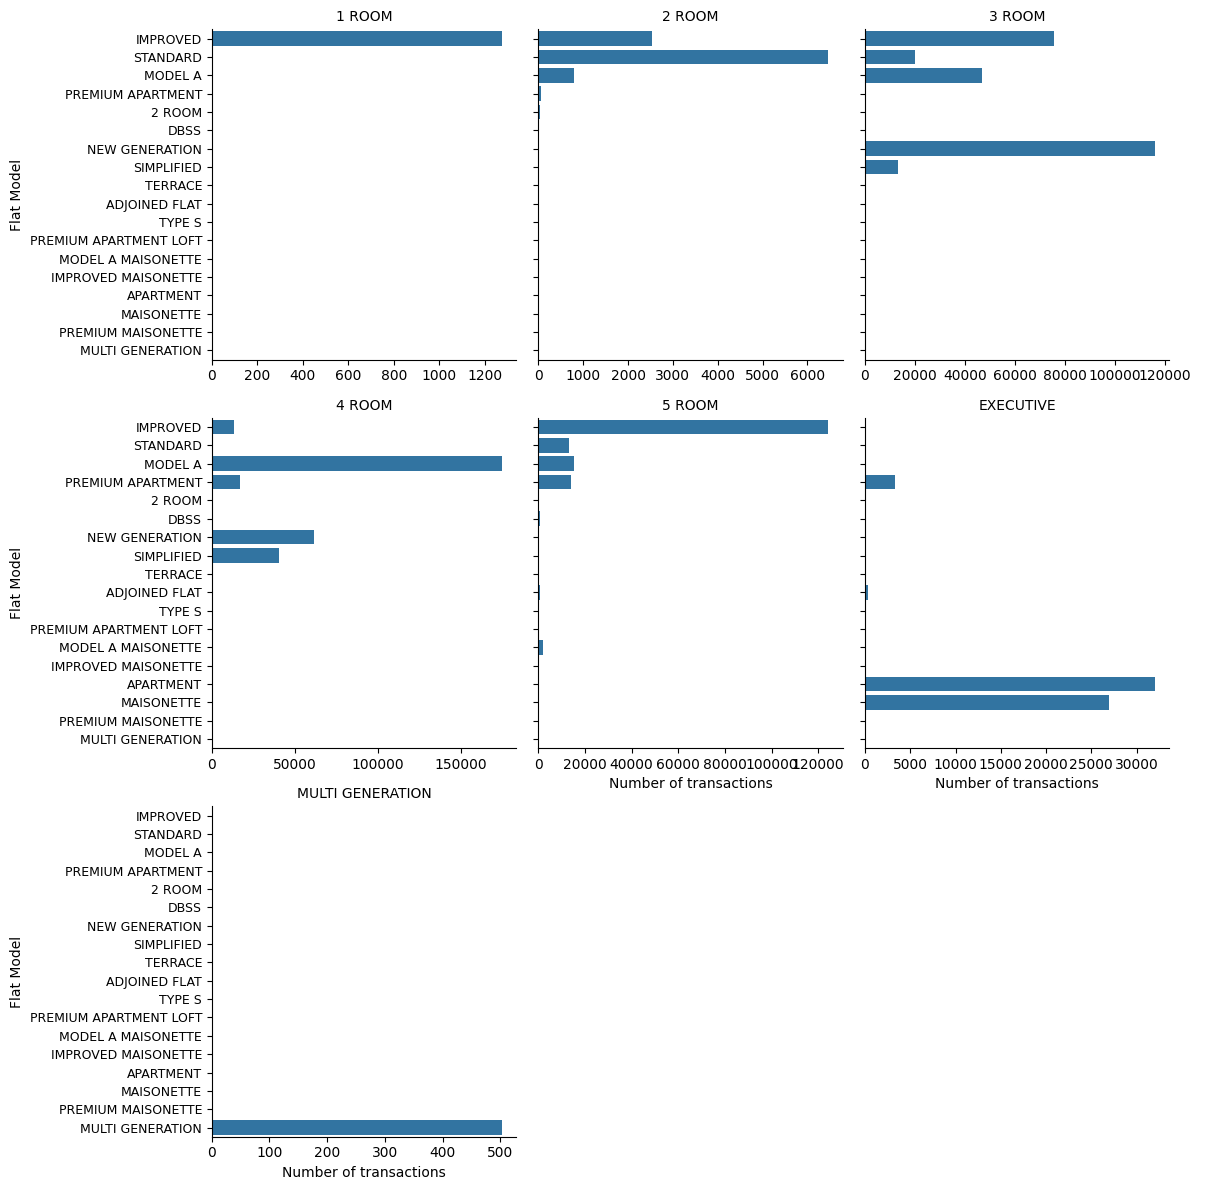

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

g = sns.catplot(
    data=flat_type_model_counts,
    x="count",
    y="flat_model",
    col="flat_type",
    kind="bar",
    col_wrap=3,
    sharex=False,
    height=4
)

g.set_titles("{col_name}")
g.set_axis_labels("Number of transactions", "Flat Model")

for ax in g.axes.flatten():
    ax.tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()


#The flat model distribution is highly imbalanced within each flat type, with a small number of dominant models accounting for most transactions. This suggests that aggressive one-hot encoding of flat_model may introduce noise and sparsity, and motivates grouping or consolidation of similar models.

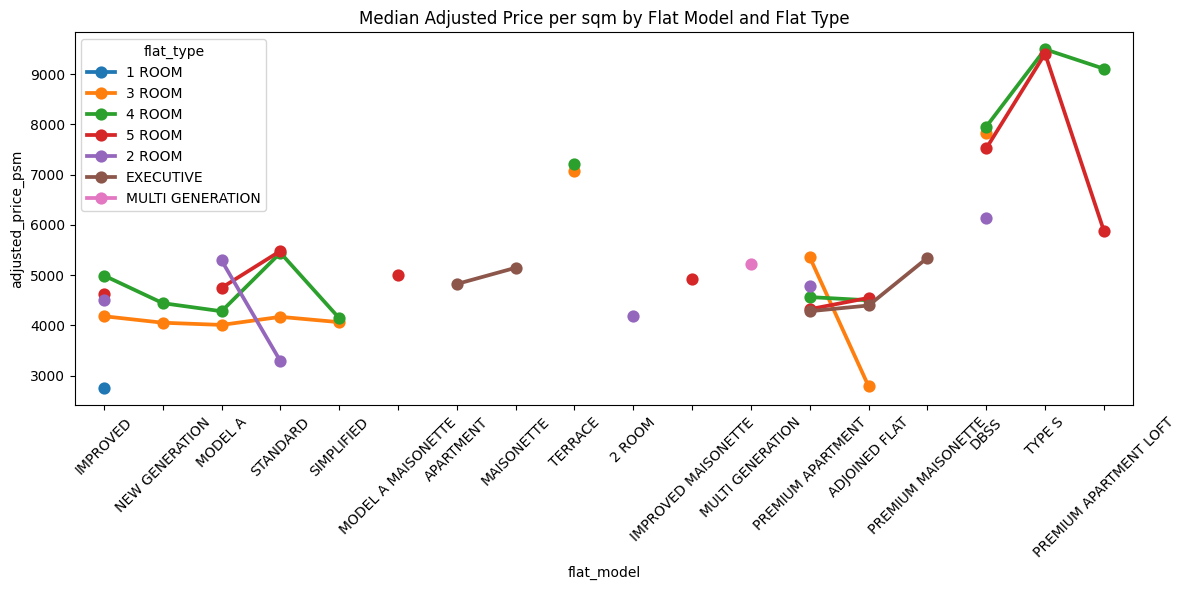

In [18]:
plt.figure(figsize=(12, 6))

sns.pointplot(
    data=df,
    x="flat_model",
    y="adjusted_price_psm",
    hue="flat_type",
    estimator="median",
    errorbar=None
)

plt.xticks(rotation=45)
plt.title("Median Adjusted Price per sqm by Flat Model and Flat Type")
plt.tight_layout()
plt.show()


'''
Price per sqm generally increases with flat size:
1–2 room flats are cheapest, followed by 3-room, 4-room, 5-room, and then Executive / Multi-Generation flats.

Flat model also matters:
For the same flat type, Premium, DBSS, Maisonette, and Type S models tend to have higher prices per sqm than older models like Improved, Standard, or Simplified.

Older flat models are cheaper:
Models such as Improved, New Generation, and Standard consistently have lower median prices per sqm, reflecting older designs and locations.

Newer / special designs command a premium:
DBSS, Premium Apartment, Premium Apartment Loft, Type S show the highest prices, especially for 4-room and 5-room flats.

Variation within the same flat type suggests that flat model captures design quality and age effects beyond flat size alone.

Both flat size and flat model strongly influence resale prices, with newer and premium models consistently commanding higher prices per sqm than older designs.

'''

### onemap api to get longtitude and latitude and postal code from address



In [ ]:


url = "https://www.onemap.gov.sg/api/auth/post/getToken"
            
payload = {
              "email": 'your_email',
              "password": 'your_password'
            }
            
response = requests.request("POST", url, json=payload)
            
print(response.text)

access_token = "your_access_token"


import requests
import requests
import os
url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal=228089&returnGeom=Y&getAddrDetails=Y&pageNum=1"
      
headers = {"Authorization": access_token}
      
response = requests.get(url, headers=headers)
      
print(response.text)


import requests
import time

def call_url(full_address, attempts=1, delay=5):
    url = (
        "https://www.onemap.gov.sg/api/common/elastic/search"
        f"?searchVal={full_address}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    )
    headers = {"Authorization": access_token}

    for _ in range(attempts):
        try:
            r = requests.get(url, headers=headers, timeout=10)
            result = r.json()
            if r.status_code == 200 and result['found'] >=1:
                return result['results'][0]
        except Exception:
            return "not found"
        time.sleep(delay)

    return None


result = call_url("ANG MO KIO AVEnue 3")



### onemap function to get hdb houseing postal code and longtitude and latitude

In [19]:

df["full_address"] = df["block"].astype(str) + " " + df["street_name"]

unique_full_address =  df['full_address'].unique()


import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from urllib.parse import quote



def call_url_one(address, session, attempts=2, delay=0.2):
    # URL-encode the query so spaces etc won’t break
    q = quote(str(address))
    url = (
        "https://www.onemap.gov.sg/api/common/elastic/search"
        f"?searchVal={q}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    )
    headers = {"Authorization": access_token}

    for i in range(attempts):
        try:
            r = session.get(url, headers=headers, timeout=5)
            if r.status_code == 200:
                data = r.json()
                if data.get("found", 0) >= 1:
                    return data["results"][0]   # first match JSON
                return None
        except Exception:
            pass
        time.sleep(delay)
    return None


def fetch_onemap_for_addresses(addresses, max_workers=20):
    rows = []

    addresses = list(pd.Series(addresses).dropna().unique())

    with requests.Session() as session:
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = {
                executor.submit(call_url_one, addr, session): addr
                for addr in addresses
            }

            for future in as_completed(futures):
                addr = futures[future]
                try:
                    result = future.result()
                except Exception:
                    result = None

                rows.append({
                    "full_address": addr,
                    "onemap_result": result
                })
    return pd.DataFrame(rows)

geo_df = fetch_onemap_for_addresses(unique_full_address, max_workers=20)

geo_df['hdb_LATITUDE'] = geo_df['onemap_result'].apply(
    lambda x: x.get('LATITUDE') if isinstance(x, dict) else None
)
geo_df['hdb_LONGITUDE'] = geo_df['onemap_result'].apply(
    lambda x: x.get('LONGITUDE') if isinstance(x, dict) else None
)

geo_df['hdb_POSTAL'] = geo_df['onemap_result'].apply(
    lambda x: x.get('POSTAL') if isinstance(x, dict) else None
)

geo_df['hdb_LATITUDE'] = pd.to_numeric(geo_df['hdb_LATITUDE'], errors='coerce')
geo_df['hdb_LONGITUDE'] = pd.to_numeric(geo_df['hdb_LONGITUDE'], errors='coerce')
geo_df['hdb_POSTAL'] = pd.to_numeric(geo_df['hdb_POSTAL'], errors='coerce')

geo_df.to_csv("data/geo_df1.csv", index=False)


'\nimport requests\nimport time\nimport pandas as pd\nfrom concurrent.futures import ThreadPoolExecutor, as_completed\nfrom urllib.parse import quote\n\n\n\ndef call_url_one(address, session, attempts=2, delay=0.2):\n    # URL-encode the query so spaces etc won’t break\n    q = quote(str(address))\n    url = (\n        "https://www.onemap.gov.sg/api/common/elastic/search"\n        f"?searchVal={q}&returnGeom=Y&getAddrDetails=Y&pageNum=1"\n    )\n    headers = {"Authorization": access_token}\n\n    for i in range(attempts):\n        try:\n            r = session.get(url, headers=headers, timeout=5)\n            if r.status_code == 200:\n                data = r.json()\n                if data.get("found", 0) >= 1:\n                    return data["results"][0]   # first match JSON\n                return None\n        except Exception:\n            pass\n        time.sleep(delay)\n    return None\n\n\ndef fetch_onemap_for_addresses(addresses, max_workers=20):\n    rows = []\n\n    addre

In [20]:
geo_df = pd.read_csv("data/geo_df1.csv")

In [21]:
geo_df

full_address  \
0      216 ANG MO KIO AVE 1   
1      219 ANG MO KIO AVE 1   
2      220 ANG MO KIO AVE 1   
3      202 ANG MO KIO AVE 3   
4      235 ANG MO KIO AVE 3   
...                     ...   
9274    164A RIVERVALE CRES   
9275  294A COMPASSVALE CRES   
9276  668A EDGEFIELD PLAINS   
9277     470C FERNVALE LINK   
9278     470B FERNVALE LINK   

                                          onemap_result  hdb_LATITUDE  \
0     {'SEARCHVAL': 'ANG MO KIO 22', 'BLK_NO': '216'...      1.366197   
1     {'SEARCHVAL': 'ANG MO KIO GROVE', 'BLK_NO': '2...      1.365982   
2     {'SEARCHVAL': 'ANG MO KIO GROVE', 'BLK_NO': '2...      1.365588   
3     {'SEARCHVAL': 'ANG MO KIO VIEW', 'BLK_NO': '20...      1.368446   
4     {'SEARCHVAL': 'KEBUN BARU PALM VIEW', 'BLK_NO'...      1.366824   
...                                                 ...           ...   
9274  {'SEARCHVAL': 'RIVERVALE DELTA', 'BLK_NO': '16...      1.390070   
9275  {'SEARCHVAL': 'COMPASSVALE BOARDWALK', 'BLK_NO...      1.396070   
9276  {'SEARCHVAL': 'WATERWAY RIDGES', 'BLK_NO': '66...      1.405019   
9277  {'SEARCHVAL': 'FERNVALE RIVERGROVE', 'BLK_NO':...      1.396194   
9278  {'SEARCHVAL': 'FERNVALE RIVERGROVE', 'BLK_NO':...      1.396871   

      hdb_LONGITUDE  hdb_POSTAL  
0        103.841505    560216.0  
1        103.840654    560219.0  
2        103.840519    560220.0  
3        103.844516    560202.0  
4        103.836491    560235.0  
...             ...         ...  
9274     103.907273    541164.0  
9275     103.895933    541294.0  
9276     103.912412    821668.0  
9277     103.879992    793470.0  
9278     103.879860    792470.0  

[9279 rows x 5 columns]

In [22]:
df = df.merge(geo_df, on="full_address", how="left")
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'year', 'remaining_lease_years', 'quarter', 'rpi', 'adjusted_price',
       'adjusted_price_psm', 'storey_mid', 'full_address', 'onemap_result',
       'hdb_LATITUDE', 'hdb_LONGITUDE', 'hdb_POSTAL'],
      dtype='object')

In [23]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'year', 'remaining_lease_years', 'quarter', 'rpi', 'adjusted_price',
       'adjusted_price_psm', 'storey_mid', 'full_address', 'onemap_result',
       'hdb_LATITUDE', 'hdb_LONGITUDE', 'hdb_POSTAL'],
      dtype='object')

### I want to check the characteristics of failed geocoding extraction from onemap 

In [24]:

df_temp = df.merge(geo_df, on="full_address", how="left")
df_merged_missing = df_temp[df_temp['hdb_LONGITUDE_y'].isna()]

street_summary = (
    df_merged_missing
      .assign(block_num=df_merged_missing["block"].astype(str).str.extract(r"(\d+)")[0])
      .groupby("street_name")
      .agg(
          min_year=("year", "min"),
          max_year=("year", "max"),
          num_unique_addresses=("full_address", "nunique"),
          blocks=("block_num", lambda s: sorted(s.dropna().unique(), key=lambda x: int(x))),
          lease_commence_dates = ("lease_commence_date", lambda s: sorted(s.dropna().unique(), key=lambda x: int(x))),
      )
      .reset_index()
      .sort_values(["num_unique_addresses", "max_year"], ascending=[False, False])
)

street_summary
import pandas as pd
pd.set_option('display.max_colwidth', 10000)
#display(street_summary)
street_summary

street_name  min_year  max_year  num_unique_addresses  \
35              REDHILL CL      1990      2012                    19   
42           TEBAN GDNS RD      1990      2007                     7   
8              BOON LAY DR      1990      2012                     6   
12             C'WEALTH DR      1990      2008                     5   
13          CLEMENTI AVE 1      1990      2007                     5   
26           KG BAHRU HILL      1990      2006                     5   
9            BT MERAH VIEW      1990      2010                     4   
48                 ZION RD      1990      2006                     4   
19                DOVER RD      1990      2004                     4   
41         TANGLIN HALT RD      1990      2003                     4   
22            HILLVIEW AVE      1990      1999                     4   
38                 SIMS DR      1990      2006                     3   
46           YUNG KUANG RD      1990      2006                     3   
44        UPP BOON KENG RD      1990      2005                     3   
37                SHORT ST      1990      1999                     3   
45        WOODLANDS CTR RD      1990      2012                     2   
15          CLEMENTI AVE 5      1990      2011                     2   
36               ROCHOR RD      1990      2011                     2   
11            C'WEALTH AVE      1990      2006                     2   
47            YUNG PING RD      1990      2006                     2   
40           TAMAN HO SWEE      1990      2003                     2   
39             STIRLING RD      1990      2001                     2   
14          CLEMENTI AVE 4      1990      2000                     2   
0             ALEXANDRA RD      1990      1999                     2   
2        ANG MO KIO AVE 10      1990      1999                     2   
23             HU CHING RD      1990      1999                     2   
28         LOR 1 TOA PAYOH      1990      1999                     2   
33                 NILE RD      1990      1999                     2   
34               OUTRAM PK      1990      1999                     2   
3         ANG MO KIO AVE 2      1990      2006                     1   
4         ANG MO KIO AVE 3      1990      2006                     1   
5         ANG MO KIO AVE 4      1990      2006                     1   
20             GHIM MOH RD      1990      2006                     1   
7             BOON LAY AVE      1990      2005                     1   
25          JLN PASAR BARU      1990      2003                     1   
21             HAVELOCK RD      1990      2002                     1   
30         LOR 5 TOA PAYOH      1990      2002                     1   
6             BEDOK NTH RD      1990      2000                     1   
32             MARGARET DR      1990      2000                     1   
1         ANG MO KIO AVE 1      1990      1999                     1   
10  BUANGKOK STH FARMWAY 1      1990      1999                     1   
16             DAKOTA CRES      1991      1999                     1   
17                DEPOT RD      1990      1999                     1   
18              DOVER CRES      1990      1999                     1   
29         LOR 2 TOA PAYOH      1990      1999                     1   
31          LOWER DELTA RD      1990      1999                     1   
43          TIONG BAHRU RD      1990      1999                     1   
24       JLN MEMBINA BARAT      1990      1998                     1   
27         LIM CHU KANG RD      1990      1998                     1   

                                                                  blocks  \
35  [1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22]   
42                                              [3, 5, 6, 7, 10, 13, 14]   
8                                         [167, 168, 169, 170, 171, 172]   
12                                                  [76, 77, 78, 79, 80]   
13                                


I was unable to obtain a few records for the geomapping from onemap, for example:
REDHILL CL 19 different blocks on Redhill Close 

TEBAN GDNS RD 7 different

BOON LAY DR 6 different blocks 

C'WEALTH DR 5 different blocks

KG BAHRU HILL 5 different blocks

Several streets (e.g. Redhill Close, Teban Gardens Road, Boon Lay Drive, Commonwealth Drive, Kg Bahru Hill) have a high number of unresolved or inconsistent block addresses.

These correspond to early public housing estates that have undergone redevelopment or renaming.

These streets correspond to very old HDB estates built in the 1970s, many of which have undergone redevelopment, renaming, or SERS over time. As a result, block numbers and addresses may no longer match modern geocoding records.

Because these inconsistencies are structural (caused by redevelopment rather than missing data), the affected records were retained but not imputed, to avoid introducing artificial location noise into the dataset.

One-line version (if space is tight)

Streets with many unresolved addresses are mainly early HDB estates that have been redeveloped or renamed over time; these records were kept but not imputed to avoid geocoding noise.

https://www.housingmap.sg/sers/. 


### # Get mrt langtitude and latitude

#We assume that MRT accessibility is an important determinant of resale flat prices, as it improves connectivity and reduces commuting cost. Rather than estimating a causal effect of specific MRT lines, we incorporate MRT accessibility as time-aware features in the predictive model.
https://smrt-stations.fandom.com/wiki/East_West_Line_MRT_Stations(Correct)
Given data availability and the long planning horizon of housing decisions, we model MRT availability at the year level.

### This MRT list has the station name, station code and year of start of operation

In [25]:

import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from urllib.parse import quote

def call_url_one(address, session, attempts=2, delay=0.2):
    # URL-encode the query so spaces etc won’t break
    q = quote(str(address))
    url = (
        "https://www.onemap.gov.sg/api/common/elastic/search"
        f"?searchVal={q}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    )
    headers = {"Authorization": access_token}

    for i in range(attempts):
        try:
            r = session.get(url, headers=headers, timeout=5)
            if r.status_code == 200:
                data = r.json()
                if data.get("found", 0) >= 1:
                    return data["results"][0]   # first match JSON
                return None
        except Exception:
            pass
        time.sleep(delay)
    return None


def fetch_onemap_for_addresses(addresses, max_workers=20):
    rows = []

    addresses = list(pd.Series(addresses).dropna().unique())

    with requests.Session() as session:
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = {
                executor.submit(call_url_one, addr, session): addr
                for addr in addresses
            }

            for future in as_completed(futures):
                addr = futures[future]
                try:
                    result = future.result()
                except Exception:
                    result = None

                rows.append({
                    "Station_code": addr,
                    "onemap_result": result
                })

    return pd.DataFrame(rows)


mrt_df = pd.read_csv("data/mrt.csv")

mrt_names = mrt_df['Station_code']

mrt_with_address = fetch_onemap_for_addresses(mrt_names, max_workers=20)

mrt_with_address = mrt_with_address.rename(columns = {'onemap_result':'MRT_onemap_result'})

mrt_df = mrt_df.merge(mrt_with_address, on = 'Station_code', how ='left')

mrt_df['mrt_LATITUDE'] = mrt_df['MRT_onemap_result'].apply(lambda x: x['LATITUDE'])
mrt_df['mrt_LONGITUDE'] = mrt_df['MRT_onemap_result'].apply(lambda x: x['LONGITUDE'])
mrt_df.drop(columns = ['MRT_onemap_result', inplace= True)

mrt_df.to_csv("data/mrt_df.csv",index=False)


mrt_df = pd.read_csv("data/mrt_df.csv")
mrt_df

MRT_name Station_code  mrt_start_year mrt_line_type  mrt_LATITUDE  \
0        Jurong East          NS1            1990            NS      1.333028   
1        Bukit Batok          NS2            1990            NS      1.349033   
2       Bukit Gombak          NS3            1990            NS      1.358612   
3      Choa Chu Kang          NS4            1990            NS      1.385363   
4            Yew Tee          NS5            1996            NS      1.397535   
..               ...          ...             ...           ...           ...   
141         Bayfront          CE1            2012            CC      1.281874   
142       Marina Bay          CE2            2012            CC      1.276251   
143  Woodlands North          TE1            2020            TE      1.448292   
144        Woodlands          TE2            2020            TE      1.436058   
145  Woodlands South          TE3            2020            TE      1.427396   

     mrt_LONGITUDE  
0       103.742370  
1       103.749566  
2       103.751791  
3       103.744371  
4       103.747405  
..             ...  
141     103.859080  
142     103.855447  
143     103.785693  
144     103.787939  
145     103.793264  

[146 rows x 6 columns]

### we want to create features nearest_mrt_dist_km from hdb to the nearest mrt that are availabe at that year point

In [26]:
import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree

EARTH_RADIUS_KM = 6371.0088
CHUNK = 200_000  # tune if memory tight


df = df.copy()
df["hdb_LATITUDE"] = pd.to_numeric(df["hdb_LATITUDE"], errors="coerce")
df["hdb_LONGITUDE"] = pd.to_numeric(df["hdb_LONGITUDE"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")  # nullable int

mrt_df = mrt_df.copy()
mrt_df["mrt_LATITUDE"] = pd.to_numeric(mrt_df["mrt_LATITUDE"], errors="coerce")
mrt_df["mrt_LONGITUDE"] = pd.to_numeric(mrt_df["mrt_LONGITUDE"], errors="coerce")
mrt_df["mrt_start_year"] = pd.to_numeric(mrt_df["mrt_start_year"], errors="coerce").astype("Int64")

# drop broken mrt rows
mrt_df = mrt_df.dropna(subset=["mrt_LATITUDE", "mrt_LONGITUDE", "mrt_start_year"]).copy()
mrt_df["mrt_start_year"] = mrt_df["mrt_start_year"].astype(int)

# sort MRT by start year once (so we can slice fast)
mrt_df = mrt_df.sort_values("mrt_start_year").reset_index(drop=True)
mrt_start = mrt_df["mrt_start_year"].to_numpy()
mrt_coords_rad = np.deg2rad(mrt_df[["mrt_LATITUDE", "mrt_LONGITUDE"]].to_numpy())

# output
nearest_mrt_dist_km = np.full(len(df), np.nan, dtype=np.float32)
# optional sanity feature:
nearest_mrt_name = np.full(len(df), None, dtype=object)

# valid rows
valid_mask = (
    df["hdb_LATITUDE"].notna()
    & df["hdb_LONGITUDE"].notna()
    & df["year"].notna()
)
valid_idx = df.index[valid_mask].to_numpy()
year_arr = df.loc[valid_mask, "year"].astype(int).to_numpy()

# unique years to process
unique_years = np.sort(np.unique(year_arr))

# cache trees per year 
tree_cache = {}

for y in unique_years:
    # only stations open by year y
    pos = np.searchsorted(mrt_start, y, side="right")
    if pos == 0:
        continue  # no MRT existed yet

    # build / reuse tree for this year
    if y not in tree_cache:
        tree_cache[y] = BallTree(mrt_coords_rad[:pos], metric="haversine")
    tree = tree_cache[y]

    # indices in df for this year
    idxs = valid_idx[year_arr == y]
    coords = np.deg2rad(df.loc[idxs, ["hdb_LATITUDE", "hdb_LONGITUDE"]].to_numpy())

    # chunk query
    for start in range(0, len(idxs), CHUNK):
        end = start + CHUNK
        idx_chunk = idxs[start:end]
        coord_chunk = coords[start:end]

        dist_rad, ind = tree.query(coord_chunk, k=1)
        nearest_mrt_dist_km[idx_chunk] = (dist_rad[:, 0] * EARTH_RADIUS_KM).astype(np.float32)

        # optional: nearest mrt name (comment out if you don't want it)
        nearest_mrt_name[idx_chunk] = mrt_df.loc[ind[:, 0], "MRT_name"].to_numpy(dtype=object)

# attach
df["nearest_mrt_dist_km"] = nearest_mrt_dist_km
df["nearest_mrt_name"] = nearest_mrt_name  # optional

df[["year", "nearest_mrt_name", "nearest_mrt_dist_km"]].head()


year nearest_mrt_name  nearest_mrt_dist_km
0  1990     Yio Chu Kang             1.251742
1  1990     Yio Chu Kang             1.251742
2  1990     Yio Chu Kang             1.251742
3  1990     Yio Chu Kang             1.251742
4  1990       Ang Mo Kio             0.986904

In [27]:
df["nearest_mrt_dist_km"].describe()

count    816010.000000
mean          1.072546
std           0.899782
min           0.036138
25%           0.528425
50%           0.822008
75%           1.239238
max           7.300477
Name: nearest_mrt_dist_km, dtype: float64

### Create feature of nearest primary school and number of primary school within 1 km
primary school list https://data.gov.sg/datasets/d_688b934f82c1059ed0a6993d2a829089/view

In [28]:

import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from urllib.parse import quote

def call_url_one(address, session, attempts=2, delay=0.2):
    # URL-encode the query so spaces etc won’t break
    q = quote(str(address))
    url = (
        "https://www.onemap.gov.sg/api/common/elastic/search"
        f"?searchVal={q}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    )
    headers = {"Authorization": access_token}

    for i in range(attempts):
        try:
            r = session.get(url, headers=headers, timeout=5)
            if r.status_code == 200:
                data = r.json()
                if data.get("found", 0) >= 1:
                    return data["results"][0]   # first match JSON
                return None
        except Exception:
            pass
        time.sleep(delay)
    return None


def fetch_onemap_for_addresses(addresses, max_workers=20):
    rows = []

    addresses = list(pd.Series(addresses).dropna().unique())

    with requests.Session() as session:
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = {
                executor.submit(call_url_one, addr, session): addr
                for addr in addresses
            }

            for future in as_completed(futures):
                addr = futures[future]
                try:
                    result = future.result()
                except Exception:
                    result = None

                rows.append({
                    "school_name": addr,
                    "onemap_result": result
                })

    return pd.DataFrame(rows)


schools = pd.read_csv("data/Generalinformationofschools.csv")

schools = schools[['school_name','address','mainlevel_code','sap_ind','autonomous_ind']]

primary_school_df = schools[schools["mainlevel_code"].isin(["PRIMARY", "MIXED LEVEL (P1-S4)"])]
primary_school_list = primary_school_df['school_name']

primary_list_with_address = fetch_onemap_for_addresses(primary_school_list, max_workers=20)
primary_list_with_address=primary_list_with_address.rename(columns = {'onemap_result':'primary_school_onemap_result'})
primary_school_df = primary_school_df.merge(primary_list_with_address, on = 'school_name', how ='left')

primary_school_df['primary_school_LATITUDE'] = primary_school_df['primary_school_onemap_result'].apply(lambda x: x['LATITUDE'])
primary_school_df['primary_school_LONGITUDE'] = primary_school_df['primary_school_onemap_result'].apply(lambda x: x['LONGITUDE'])
primary_school_df.drop(columns = ['primary_school_onemap_result', inplace= True)
primary_school_df.to_csv("data/primary_school_df.csv",index=False)


primary_df = pd.read_csv("data/primary_school_df.csv")
primary_df


school_name                        address  \
0        ADMIRALTY PRIMARY SCHOOL         11 WOODLANDS CIRCLE      
1    AHMAD IBRAHIM PRIMARY SCHOOL         10 YISHUN STREET 11      
2                  AI TONG SCHOOL       100 Bright Hill Drive      
3        ALEXANDRA PRIMARY SCHOOL  2A Prince Charles Crescent      
4     ANCHOR GREEN PRIMARY SCHOOL         31 Anchorvale Drive      
..                            ...                            ...   
177          YUHUA PRIMARY SCHOOL   158 JURONG EAST STREET 24      
178          YUMIN PRIMARY SCHOOL        3 TAMPINES STREET 21      
179        ZHANGDE PRIMARY SCHOOL            51 Jalan Membina      
180       ZHENGHUA PRIMARY SCHOOL                9 Fajar Road      
181       ZHONGHUA PRIMARY SCHOOL       12 SERANGOON AVENUE 4      

    mainlevel_code sap_ind autonomous_ind  primary_school_LATITUDE  \
0          PRIMARY      No             No                 1.442635   
1          PRIMARY      No             No                 1.433153   
2          PRIMARY     Yes             No                 1.360583   
3          PRIMARY      No             No                 1.291334   
4          PRIMARY      No             No                 1.390370   
..             ...     ...            ...                      ...   
177        PRIMARY      No             No                 1.342802   
178        PRIMARY      No             No                 1.351292   
179        PRIMARY      No             No                 1.284212   
180        PRIMARY      No             No                 1.379549   
181        PRIMARY      No             No                 1.360203   

     primary_school_LONGITUDE  
0                  103.800040  
1                  103.832942  
2                  103.833020  
3                  103.824425  
4                  103.887165  
..                        ...  
177                103.741106  
178                103.950462  
179                103.825952  
180                103.769314  
181                103.869762  

[182 rows x 7 columns]

In [29]:
import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree

EARTH_RADIUS_KM = 6371.0088
RADIUS_KM = 1.0
RADIUS_RAD = RADIUS_KM / EARTH_RADIUS_KM

df = df.copy()

# numeric + keep NaNs
df["hdb_LATITUDE"] = pd.to_numeric(df["hdb_LATITUDE"], errors="coerce")
df["hdb_LONGITUDE"] = pd.to_numeric(df["hdb_LONGITUDE"], errors="coerce")

primary_df = primary_df.copy()
primary_df["primary_school_LATITUDE"] = pd.to_numeric(primary_df["primary_school_LATITUDE"], errors="coerce")
primary_df["primary_school_LONGITUDE"] = pd.to_numeric(primary_df["primary_school_LONGITUDE"], errors="coerce")
primary_df = primary_df.dropna(subset=["primary_school_LATITUDE", "primary_school_LONGITUDE"]).reset_index(drop=True)

# Build BallTree once
school_coords_rad = np.deg2rad(
    primary_df[["primary_school_LATITUDE", "primary_school_LONGITUDE"]].to_numpy()
)
tree = BallTree(school_coords_rad, metric="haversine")

# Prepare outputs
n = len(df)
nearest_primary_dist_km = np.full(n, np.nan, dtype=np.float32)
nearest_primary_name = np.full(n, None, dtype=object)
primary_count_within = np.full(n, np.nan, dtype=np.float32)

valid_mask = df["hdb_LATITUDE"].notna() & df["hdb_LONGITUDE"].notna()
valid_idx = df.index[valid_mask].to_numpy()

# Query in chunks 
CHUNK = 200_000
coords_all = np.deg2rad(df.loc[valid_idx, ["hdb_LATITUDE", "hdb_LONGITUDE"]].to_numpy())

for start in range(0, len(valid_idx), CHUNK):
    end = start + CHUNK
    idx_chunk = valid_idx[start:end]
    coord_chunk = coords_all[start:end]

    # 1) nearest primary distance + name
    dist_rad, ind = tree.query(coord_chunk, k=1)
    nearest_primary_dist_km[idx_chunk] = (dist_rad[:, 0] * EARTH_RADIUS_KM).astype(np.float32)
    nearest_primary_name[idx_chunk] = primary_df.loc[ind[:, 0], "school_name"].to_numpy(dtype=object)

    # 2) count within radius
    primary_count_within[idx_chunk] = tree.query_radius(
        coord_chunk, r=RADIUS_RAD, count_only=True
    ).astype(np.float32)

# Attach features
df["nearest_primary_dist_km"] = nearest_primary_dist_km
df["nearest_primary_name"] = nearest_primary_name  # optional but great for sanity checks
df[f"primary_count_within_{RADIUS_KM}km"] = primary_count_within
df[["nearest_primary_name", "nearest_primary_dist_km", f"primary_count_within_{RADIUS_KM}km"]].head()

nearest_primary_name  nearest_primary_dist_km  \
0  CHIJ ST. NICHOLAS GIRLS' SCHOOL                 0.397193   
1  CHIJ ST. NICHOLAS GIRLS' SCHOOL                 0.397193   
2  CHIJ ST. NICHOLAS GIRLS' SCHOOL                 0.397193   
3  CHIJ ST. NICHOLAS GIRLS' SCHOOL                 0.397193   
4        ANG MO KIO PRIMARY SCHOOL                 0.405152   

   primary_count_within_1.0km  
0                         2.0  
1                         2.0  
2                         2.0  
3                         2.0  
4                         1.0

In [30]:
df["nearest_primary_dist_km"].describe()

count    816010.000000
mean          0.418873
std           0.249347
min           0.042776
25%           0.243207
50%           0.371535
75%           0.536378
max           5.144551
Name: nearest_primary_dist_km, dtype: float64

### Plot the mrt and primary school features vs target

C:\Users\Jiany\AppData\Local\Temp\ipykernel_156100\194273198.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("mrt_dist_bin")["adjusted_price_psm"]


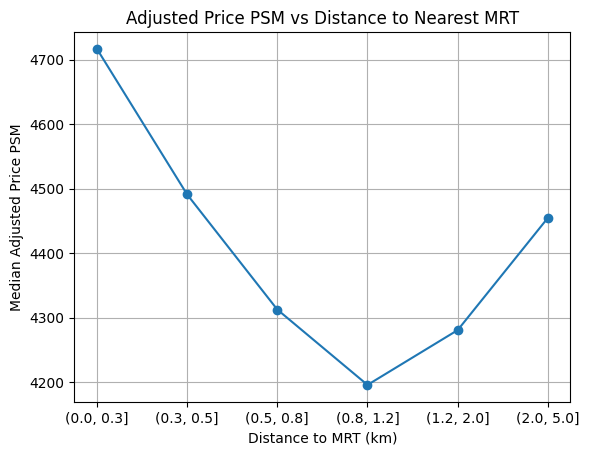

C:\Users\Jiany\AppData\Local\Temp\ipykernel_156100\194273198.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("pri_dist_bin")["adjusted_price_psm"]


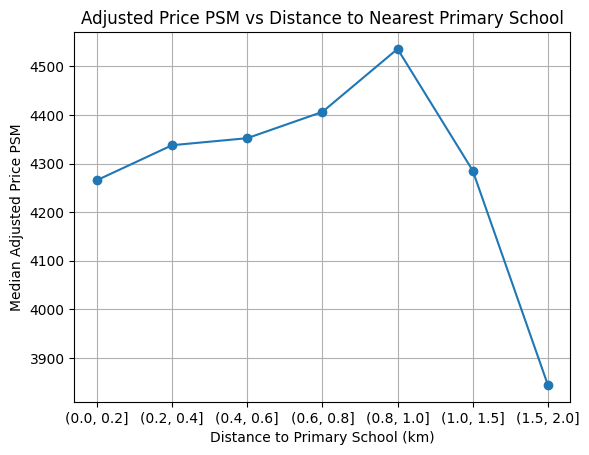

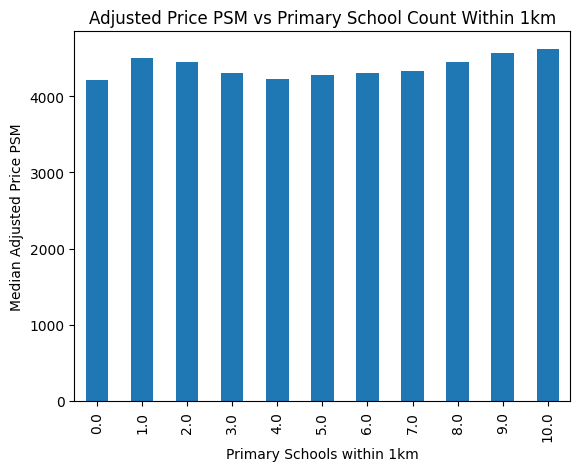

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) adjusted_price_psm vs nearest MRT distance

(
    df
    .loc[
        df["adjusted_price_psm"].notna() &
        df["nearest_mrt_dist_km"].notna() &
        (df["nearest_mrt_dist_km"] <= 5)
    ]
    .assign(
        mrt_dist_bin=pd.cut(
            df["nearest_mrt_dist_km"],
            bins=[0, 0.3, 0.5, 0.8, 1.2, 2.0, 5.0]
        )
    )
    .groupby("mrt_dist_bin")["adjusted_price_psm"]
    .median()
    .plot(marker="o", title="Adjusted Price PSM vs Distance to Nearest MRT")
)
plt.xlabel("Distance to MRT (km)")
plt.ylabel("Median Adjusted Price PSM")
plt.grid(True)
plt.show()



# adjusted_price_psm vs nearest primary distance

(
    df
    .loc[
        df["adjusted_price_psm"].notna() &
        df["nearest_primary_dist_km"].notna() &
        (df["nearest_primary_dist_km"] <= 5)
    ]
    .assign(
        pri_dist_bin=pd.cut(
            df["nearest_primary_dist_km"],
            bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2.0]

        )
    )
    .groupby("pri_dist_bin")["adjusted_price_psm"]
    .median()
    .plot(marker="o", title="Adjusted Price PSM vs Distance to Nearest Primary School")
)
plt.xlabel("Distance to Primary School (km)")
plt.ylabel("Median Adjusted Price PSM")
plt.grid(True)
plt.show()


#adjusted_price_psm vs primary count within 1km

(
    df
    .loc[
        df["adjusted_price_psm"].notna() &
        df["primary_count_within_1.0km"].notna()
    ]
    .groupby("primary_count_within_1.0km")["adjusted_price_psm"]
    .median()
    .plot(kind="bar", title="Adjusted Price PSM vs Primary School Count Within 1km")
)
plt.xlabel("Primary Schools within 1km")
plt.ylabel("Median Adjusted Price PSM")
plt.show()


In [32]:
df.groupby(
    pd.cut(df["nearest_primary_dist_km"],
           bins=[0,0.2,0.4,0.6,0.8,1.0,1.5,2.0])
)["adjusted_price_psm"].agg(["count","median"])

C:\Users\Jiany\AppData\Local\Temp\ipykernel_156100\223095586.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


count       median
nearest_primary_dist_km                     
(0.0, 0.2]               132669  4265.761234
(0.2, 0.4]               316356  4337.790705
(0.4, 0.6]               220081  4352.227684
(0.6, 0.8]                95262  4406.310492
(0.8, 1.0]                27383  4535.907859
(1.0, 1.5]                20255  4285.608771
(1.5, 2.0]                 3650  3844.496421

### MRT we observed
High price very close to MRT (0–300m)

Clear drop as distance increases

Lowest around ~0.8–1.2 km

Slight rebound after 2 km

2km bins are often:

mature estates

larger flats

higher floor area

Distance-to-MRT effect saturates, then other factors dominate

Adjusted price per sqm decreases sharply within 1km of MRT, with diminishing marginal impact beyond that.





### Primary schools 
Primary schools are not a uniform amenity like MRT, so proximity does not translate linearly into price.

Very close (0–200m)
Often associated with older HDB blocks, higher noise and traffic, and smaller flat sizes.
As a result, price per sqm can be lower despite close proximity.

Sweet spot (600m–1km)
Walkable distance without noise, and within the typical 1km admission radius, which drives strong family demand.
This creates a peak in prices around the 0.8–1.0 km range — a real behavioural effect.

Beyond 1km
More common in newer or outer towns (e.g., Jurong West, Punggol, Sengkang), where schools are plentiful but not necessarily elite, and overall price levels are lower.
Hence prices drop after 1km.

Overall, primary school proximity exhibits a non-linear sweet-spot effect rather than a monotonic relationship.

### Create a distance to city center feature

In [31]:
mrt_df[mrt_df.MRT_name == 'Raffles Place']

CITY_LAT = 1.284126
CITY_LON = 103.851462
EARTH_RADIUS_KM = 6371.0088


import numpy as np
import pandas as pd

df["hdb_LATITUDE"] = pd.to_numeric(df["hdb_LATITUDE"], errors="coerce")
df["hdb_LONGITUDE"] = pd.to_numeric(df["hdb_LONGITUDE"], errors="coerce")

# radians
lat1 = np.deg2rad(df["hdb_LATITUDE"].values)
lon1 = np.deg2rad(df["hdb_LONGITUDE"].values)
lat2 = np.deg2rad(CITY_LAT)
lon2 = np.deg2rad(CITY_LON)

# haversine
dlat = lat1 - lat2
dlon = lon1 - lon2

a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

df["dist_to_city_centre_km"] = (EARTH_RADIUS_KM * c).astype("float32")
df


month        town  flat_type block       street_name storey_range  \
0      1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1      1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2      1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3      1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4      1990-01-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...           ...         ...        ...   ...               ...          ...   
826576 2020-09-01      YISHUN     5 ROOM   716      YISHUN ST 71     07 TO 09   
826577 2020-09-01      YISHUN     5 ROOM   760      YISHUN ST 72     07 TO 09   
826578 2020-09-01      YISHUN     5 ROOM   835      YISHUN ST 81     04 TO 06   
826579 2020-09-01      YISHUN  EXECUTIVE   791      YISHUN AVE 2     04 TO 06   
826580 2020-09-01      YISHUN  EXECUTIVE   387    YISHUN RING RD     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
826576           131.0        IMPROVED                 1987      440000.0   
826577           122.0        IMPROVED                 1987      458000.0   
826578           122.0        IMPROVED                 1987      490000.0   
826579           146.0      MAISONETTE                 1987      558000.0   
826580           146.0      MAISONETTE                 1988      555000.0   

        ...  \
0       ...   
1       ...   
2       ...   
3       ...   
4       ...   
...     ...   
826576  ...   
826577  ...   
826578  ...   
826579  ...   
826580  ...   

                                                                                                                                                                                                                                                                                                                                                                                         onemap_result  \
0                                                                   {'SEARCHVAL': 'HORIZON GARDENS', 'BLK_NO': '309', 'ROAD_NAME': 'ANG MO KIO AVENUE 2', 'BUILDING': 'HORIZON GARDENS', 'ADDRESS': '309 ANG MO KIO AVENUE 2 HORIZON GARDENS SINGAPORE 569953', 'POSTAL': '569953', 'X': '28157.4530873811', 'Y': '39889.0057018362', 'LATITUDE': '1.37701651576853', 'LONGITUDE': '103.834733409768'}   
1                                                                   {'SEARCHVAL': 'HORIZON GARDENS', 'BLK_NO': '309', 'ROAD_NAME': 'ANG MO KIO AVENUE 2', 'BUILDING': 'HORIZON GARDENS', 'ADDRESS': '309 ANG MO KIO AVENUE 2 HORIZON GARDENS SINGAPORE 569953', 'POSTAL': '569953', 'X': '28157.4530873811', 'Y': '39889.0057018362', 'LATITUDE': '1.37701651576853', 'LONGITUDE': '103.834733409768'}   
2                                                                   {'SEARCHVAL': 'HORIZON GARDENS', 'BLK_NO': '309', 'ROAD_NAME': 'ANG MO KIO AVENUE 2', 'BUILDING': 'HORIZON GARDENS', 'ADDRESS': '309 ANG MO KIO AVENUE 2 HORIZON GARDENS SINGAPORE 569953', 'POSTAL': '569953', 'X': '28157.4530873811', 'Y': '39889.0057018362', 'LATITUDE': '1.37701651576853', 'LONGITUDE': '103.834733409768'}   
3                                                                   {'SEARCHVAL': 'HORIZON GARDENS', 'BLK_NO': '309', 'ROAD_NAME': 'ANG MO KIO AVENUE 2', 'BUILDING': 'HORIZON GARDENS', 'ADDRESS': '309 ANG MO KIO AVENUE 2 HORIZON GARDENS SINGAPORE 569953', 'POSTAL': '569953', 'X': '28157.4530873811', 'Y': '39889.0057018362', 'LATITUDE': '1.37701651576853',

In [32]:
df["dist_to_city_centre_km"].describe()

count    816010.000000
mean         12.063973
std           4.400107
min           0.584962
25%           9.130517
50%          12.700808
75%          15.453438
max          22.378563
Name: dist_to_city_centre_km, dtype: float64

### Plot price vs distance to city center

C:\Users\Jiany\AppData\Local\Temp\ipykernel_30920\623205691.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("city_dist_bin")["adjusted_price_psm"]


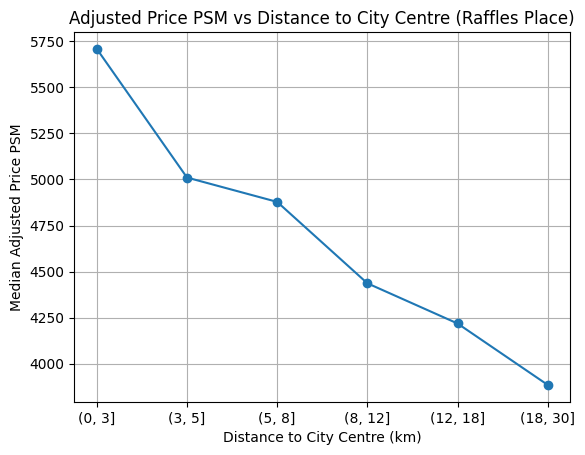

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

(
    df
    .loc[
        df["adjusted_price_psm"].notna() &
        df["dist_to_city_centre_km"].notna() &
        (df["dist_to_city_centre_km"] <= 30)   # cap extremes
    ]
    .assign(
        city_dist_bin=pd.cut(
            df["dist_to_city_centre_km"],
            bins=[0, 3, 5, 8, 12, 18, 30]
        )
    )
    .groupby("city_dist_bin")["adjusted_price_psm"]
    .median()
    .plot(marker="o")
)

plt.title("Adjusted Price PSM vs Distance to City Centre (Raffles Place)")
plt.xlabel("Distance to City Centre (km)")
plt.ylabel("Median Adjusted Price PSM")
plt.grid(True)
plt.show()


Resale prices per sqm decline steadily with increasing distance from the city centre, with a strong central premium concentrated within the inner 3–5 km.

### Check the Median Resale Price over time

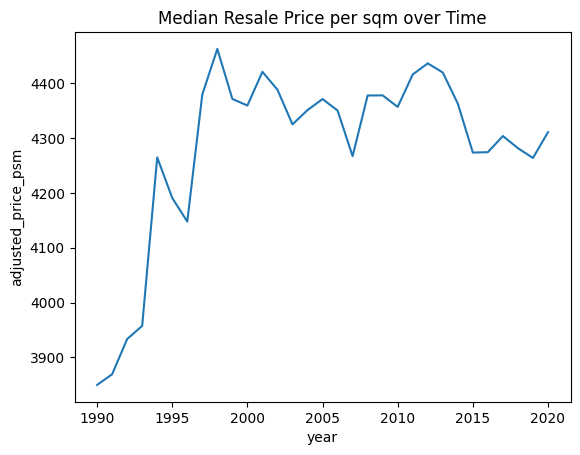

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(
    data=df.groupby('year')['adjusted_price_psm'].median().reset_index(),
    x='year', y='adjusted_price_psm'
)
plt.title('Median Resale Price per sqm over Time')
plt.show()

Resale prices per sqm rose sharply in the early 1990s, peaked around the late 1990s to early 2000s, and thereafter fluctuated within a relatively stable range with cyclical ups and downs.

### Price trend over time by town (top towns only)


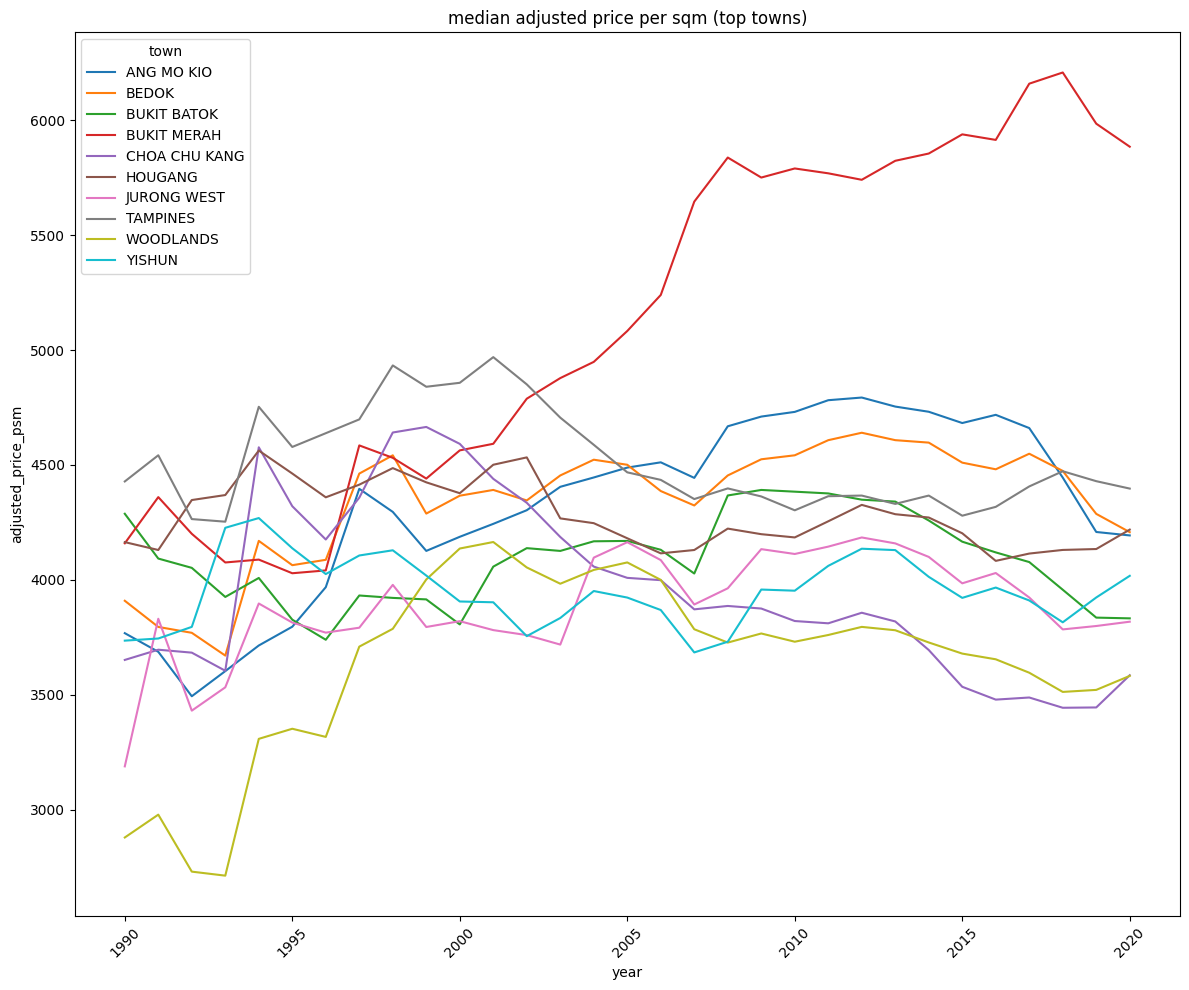

In [35]:
target = "adjusted_price_psm"
top_towns = df["town"].value_counts().head(10).index
tmp = df[df["town"].isin(top_towns)].groupby(["year","town"])[target].median().reset_index()

plt.figure(figsize=(12,10))
sns.lineplot(data=tmp, x="year", y=target, hue="town")
plt.xticks(rotation=45)
plt.title("median adjusted price per sqm (top towns)")
plt.tight_layout()
plt.show()

When broken down by town, price levels and trends differ clearly, with more central or mature towns consistently commanding higher prices than outer towns.
Despite these differences, most towns follow similar cycles over time, suggesting that market-wide factors drive overall movements while location explains persistent price gaps.

### check town vs price per sqm

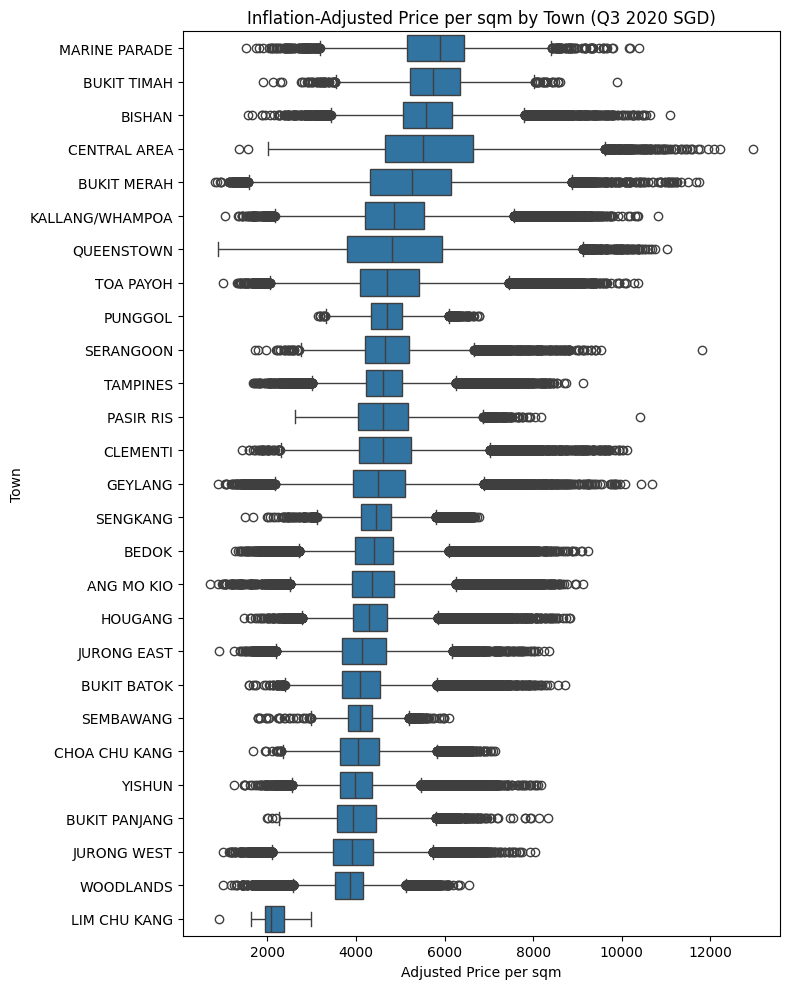

In [36]:
town_order = (
    df.groupby('town')['adjusted_price_psm']
      .median()
      .sort_values(ascending=False)
      .index
)
plt.figure(figsize=(8, 10))

sns.boxplot(
    data=df,
    y='town',
    x='adjusted_price_psm',
    order=town_order
)

plt.title('Inflation-Adjusted Price per sqm by Town (Q3 2020 SGD)')
plt.xlabel('Adjusted Price per sqm')
plt.ylabel('Town')
plt.tight_layout()
plt.show()


Prices per sqm vary widely by town, with central and mature estates like Marine Parade, Bukit Timah, and the Central Area commanding the highest medians.
Mid-tier towns (e.g. Queenstown, Bishan, Kallang/Whampoa) show strong prices but with broader spreads, reflecting mixed flat types and ages.
Outer and newer towns such as Jurong West, Woodlands, and Sembawang generally have lower medians, though price distributions overlap due to factors like flat size, age, and proximity to amenities.

### check storey vs price per sqm

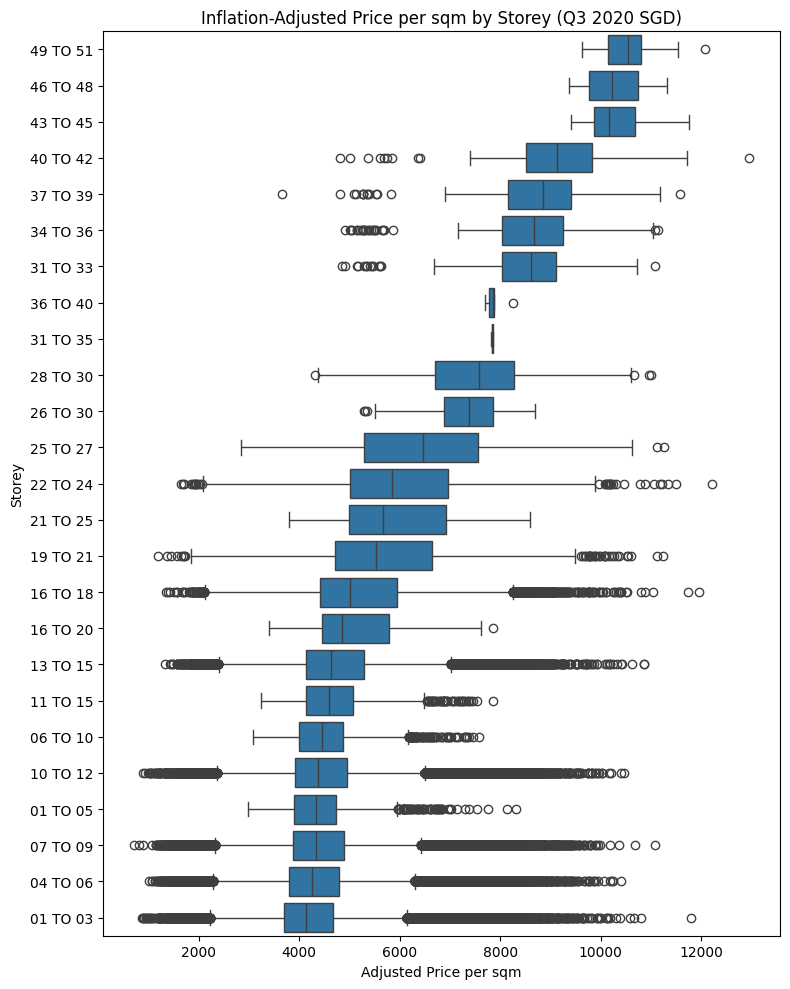

In [37]:
storey_order = (
    df.groupby('storey_range')['adjusted_price_psm']
      .median()
      .sort_values(ascending=False)
      .index
)
plt.figure(figsize=(8,10))

sns.boxplot(
    data=df,
    y='storey_range',
    x='adjusted_price_psm',
    order = storey_order
)

plt.title('Inflation-Adjusted Price per sqm by Storey (Q3 2020 SGD)')
plt.xlabel('Adjusted Price per sqm')
plt.ylabel('Storey')
plt.tight_layout()
plt.show()


Prices per sqm generally increase with storey height, reflecting premiums for better views, ventilation, and reduced noise.
Lower floors tend to be cheaper and show wider variability, while mid-to-high floors cluster at higher price levels.
Very high storeys command the highest medians, though the number of such flats is smaller, leading to tighter but more selective distributions.

### CHECK flat_type vs price per sqm

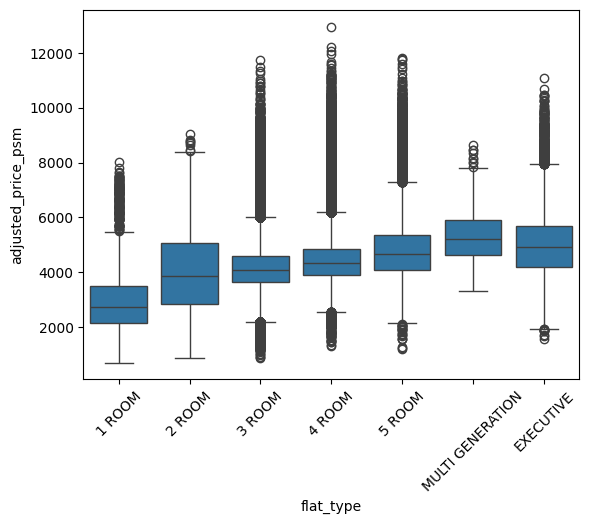

In [38]:

sns.boxplot(data=df, x='flat_type', y='adjusted_price_psm', order = ['1 ROOM','2 ROOM','3 ROOM','4 ROOM','5 ROOM','MULTI GENERATION','EXECUTIVE'])
plt.xticks(rotation=45)
plt.show()

Resale price per sqm increases with flat type, reflecting larger size and better layouts in higher-end units.
Smaller flats (1–2 room) are the cheapest on average, while 4–5 room and executive flats command higher prices.
Price spreads widen for larger flats, showing more variation driven by location, age, and amenities.

In [39]:
df = df[['town', 'flat_type', 'block', 'street_name', 'storey_range','storey_mid', 
       'flat_model', 'lease_commence_date', 'year', 'remaining_lease_years',
       'adjusted_price_psm','full_address','hdb_LATITUDE', 'hdb_LONGITUDE', 'hdb_POSTAL','nearest_mrt_dist_km',
       'nearest_primary_dist_km','dist_to_city_centre_km','floor_area_sqm']]

### Distribution and skweness of numerical features

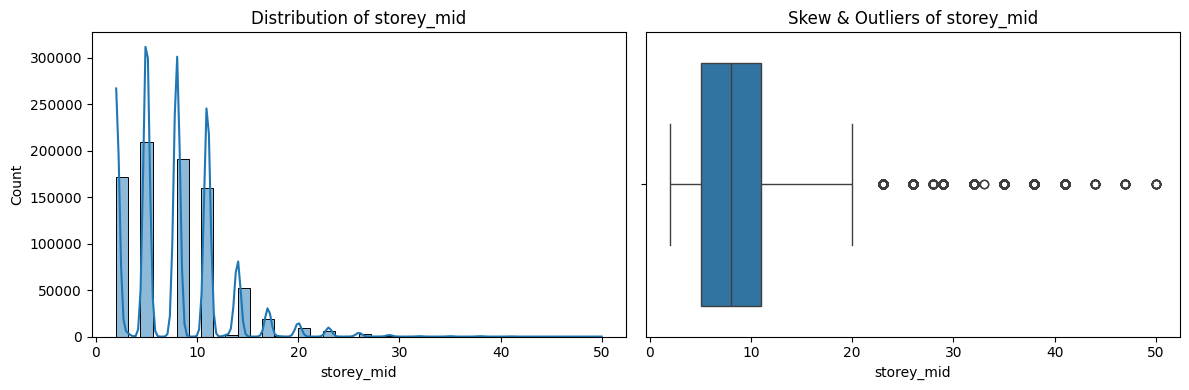

storey_mid skewness: 1.19
--------------------------------------------------


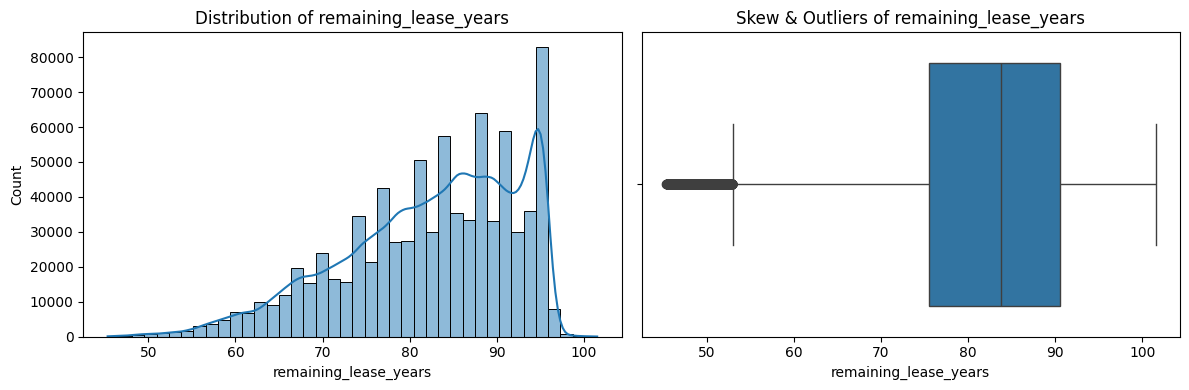

remaining_lease_years skewness: -0.68
--------------------------------------------------


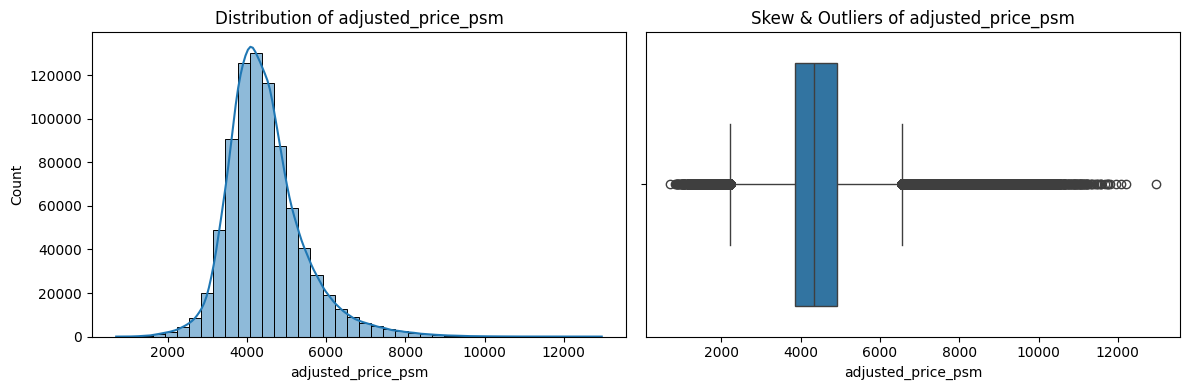

adjusted_price_psm skewness: 1.07
--------------------------------------------------


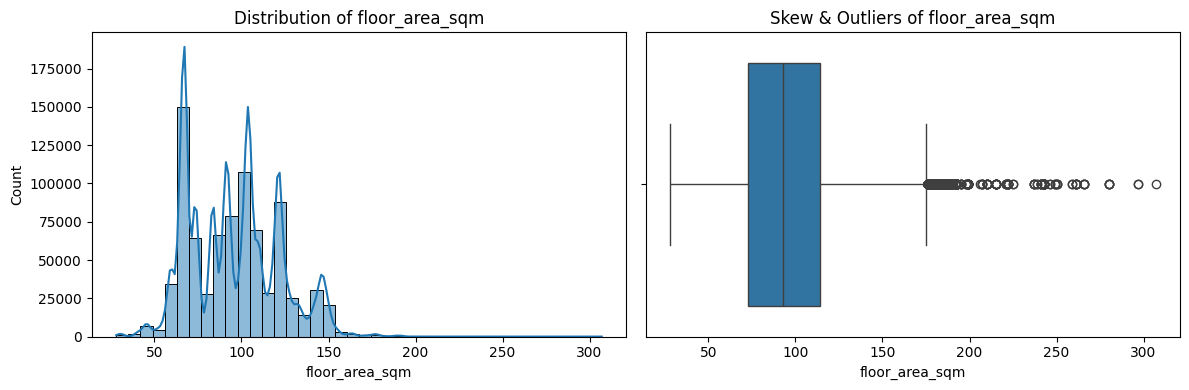

floor_area_sqm skewness: 0.38
--------------------------------------------------


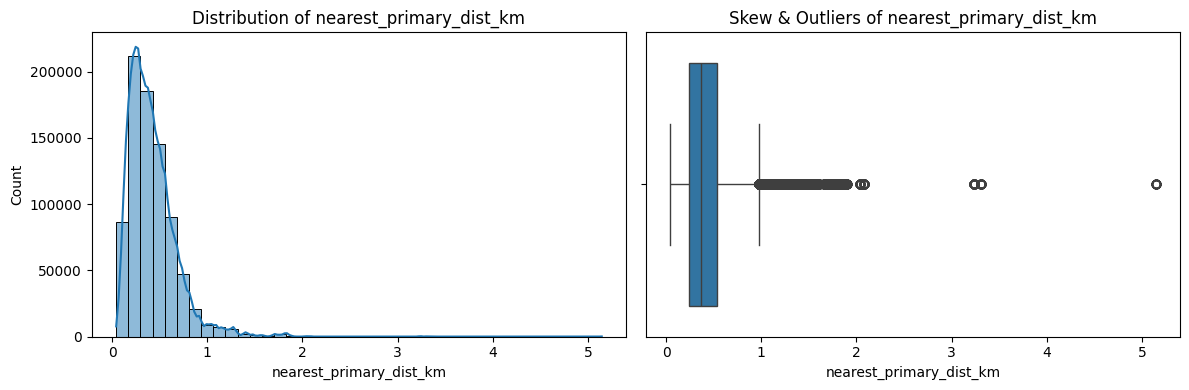

nearest_primary_dist_km skewness: 2.14
--------------------------------------------------


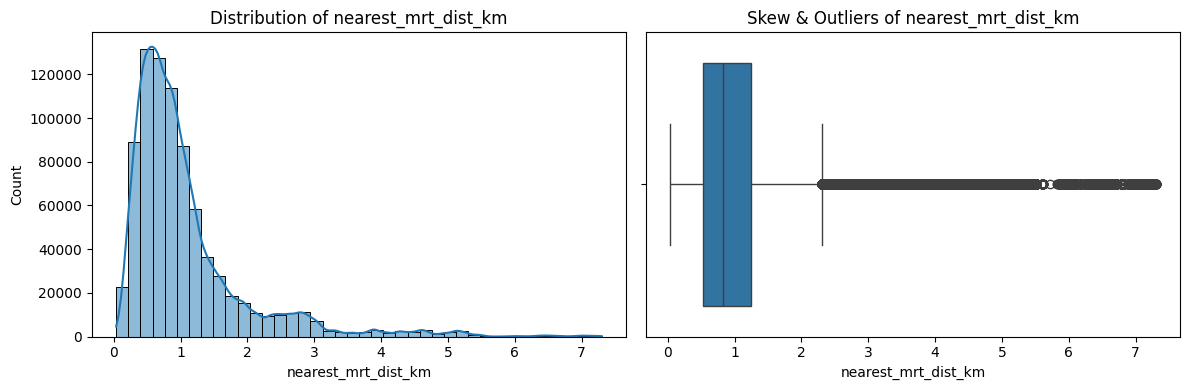

nearest_mrt_dist_km skewness: 2.54
--------------------------------------------------


In [40]:
num_cols =['storey_mid','remaining_lease_years','adjusted_price_psm','floor_area_sqm','nearest_primary_dist_km','nearest_mrt_dist_km']
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram (distribution)
    sns.histplot(df[col].dropna(), bins=40, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")

    # Boxplot (skew / outliers)
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Skew & Outliers of {col}")

    plt.tight_layout()
    plt.show()

    # Print skewness
    print(f"{col} skewness: {df[col].skew():.2f}")
    print("-" * 50)


Adjusted price per sqm (adjusted_price_psm):
Prices cluster around a central range with a right-skewed tail, indicating a small number of high-priced outliers.

Storey (storey_mid):
Most resale flats are on low to mid floors, with far fewer transactions at very high storeys.

Remaining lease years:
Most resale flats still have a long remaining lease, with transactions concentrated above 60 years.

Nearest MRT distance (nearest_mrt_dist_km):
Most resale flats are located within about 1 km of an MRT station, with far fewer flats located very far away.

Nearest primary school distance (nearest_primary_dist_km):
The majority of flats are very close to a primary school, reflecting dense school coverage across residential areas.

Distance to city centre (dist_to_city_centre_km):
Flats are spread across the island, with most homes located in mid-range distances rather than right in the city core.

Floor area (floor_area_sqm):
Flat sizes cluster around typical HDB layouts, with a long right tail representing larger units such as executive and multi-generation flats.

### check categorical features count

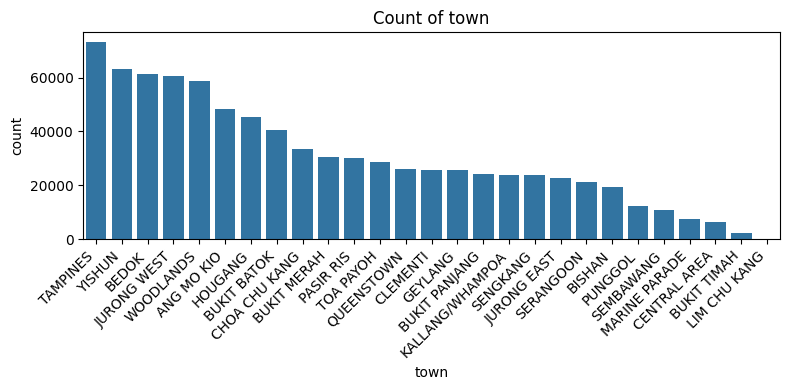

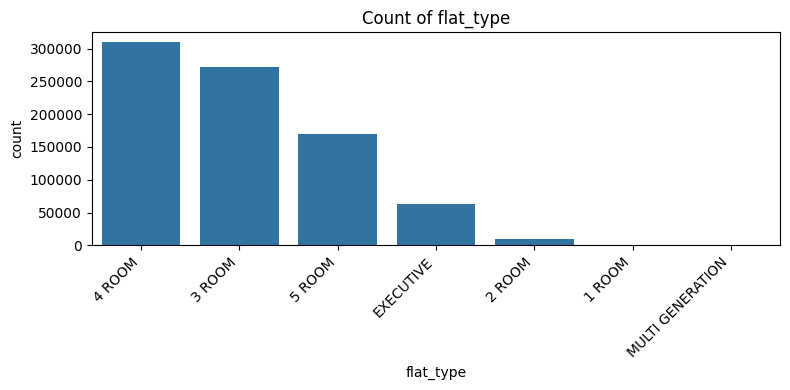

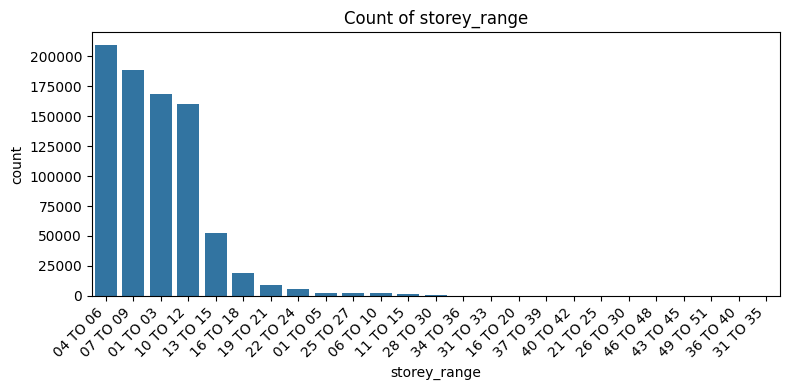

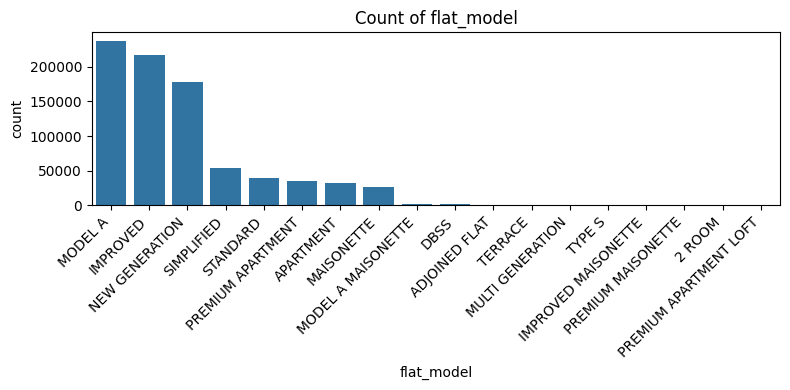

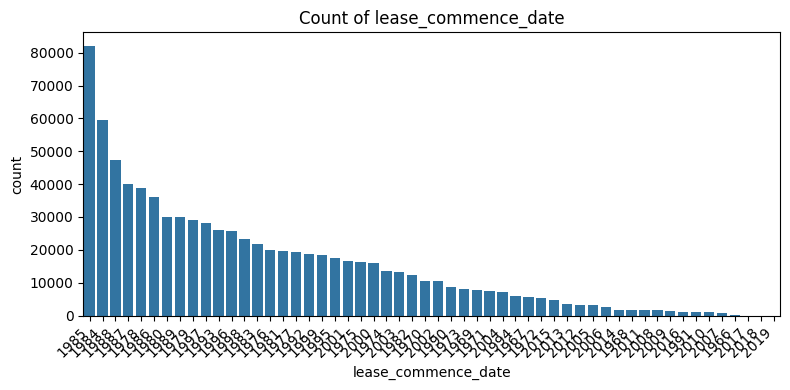

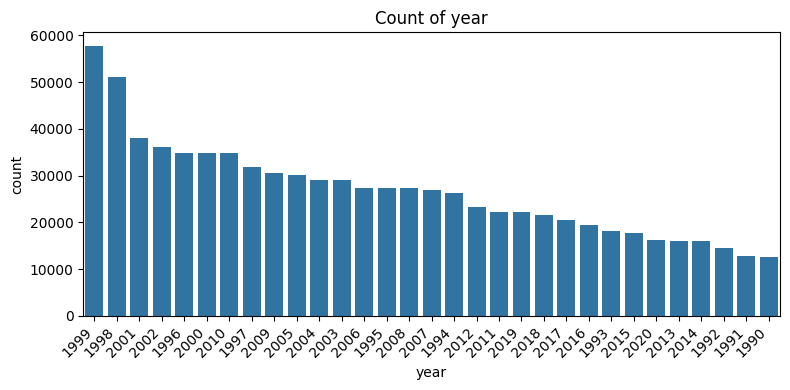

In [41]:
cat_cols = ['town', 'flat_type', 'storey_range','flat_model','lease_commence_date','year']

for col in cat_cols:
    plt.figure(figsize=(8, 4))

    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index
    )

    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Price per sqm vs remaining_lease_years and floor_area_sqm

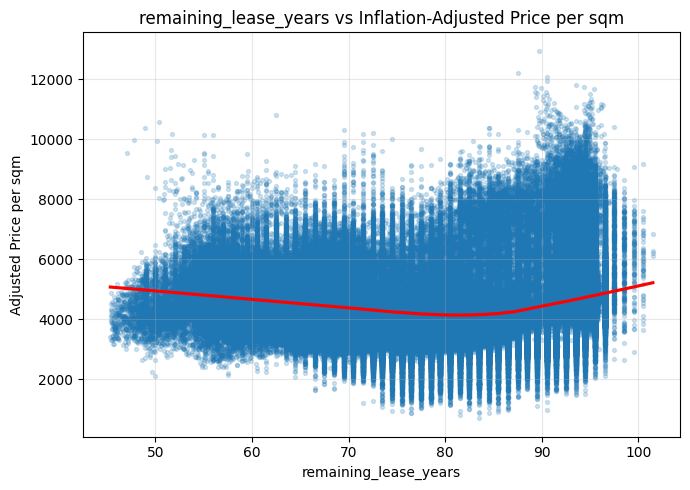

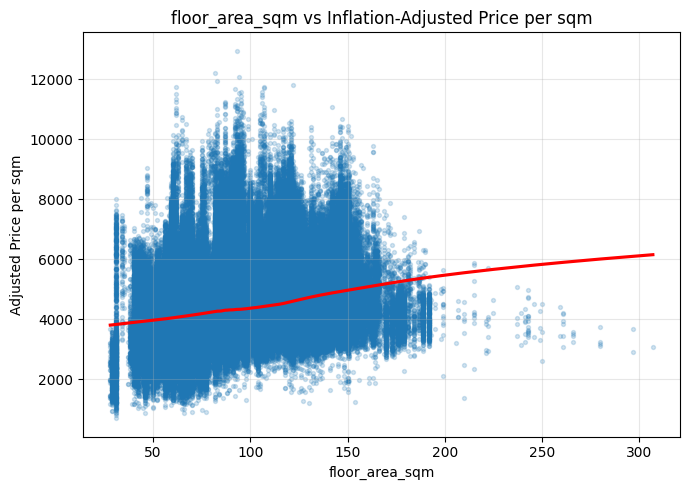

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

target = "adjusted_price_psm"

check_cols = ['remaining_lease_years','floor_area_sqm']
for col in check_cols:
    plt.figure(figsize=(7, 5))

    sns.regplot(
        data=df,
        x=col,
        y=target,
        scatter_kws={"alpha": 0.2, "s": 8},
        line_kws={"color": "red"},
        lowess=True   # smoother, safer for non-linear relationships
    )

    plt.title(f"{col} vs Inflation-Adjusted Price per sqm")
    plt.xlabel(col)
    plt.ylabel("Adjusted Price per sqm")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


Remaining lease years: Prices per sqm dip slightly for mid-lease flats and rise again for very long remaining leases, reflecting a premium for newer or recently renewed flats.

Floor area: Larger flats tend to have higher prices per sqm on average, but with substantial dispersion, showing that size alone does not determine value.

### check HDB size over time

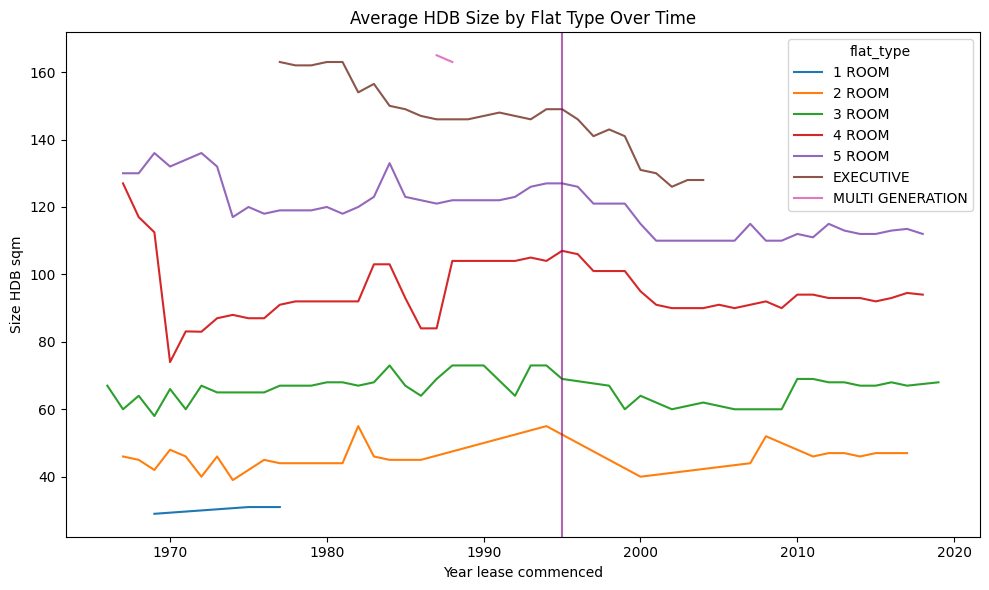

In [43]:
plot_df = (
    df.groupby(['lease_commence_date', 'flat_type'])['floor_area_sqm']
      .median()
      .reset_index()
)

import seaborn as sns

plt.figure(figsize=(10,6))

sns.lineplot(
    data=plot_df,
    x='lease_commence_date',
    y='floor_area_sqm',
    hue='flat_type',
    hue_order=['1 ROOM','2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM','EXECUTIVE','MULTI GENERATION']
)

plt.axvline(1995, color='purple', alpha=0.6)


plt.xlabel('Year lease commenced')
plt.ylabel('Size HDB sqm')
plt.title('Average HDB Size by Flat Type Over Time')
plt.tight_layout()
plt.show()
#Response A highlights that although flat sizes have been shrinking from the 1995 high, they have stabilised since 2000, and suggests the public message can emphasise that part instead. Telling the public that flat sizes have stabilised for nearly two decades now is factually accurate, after all.

Older HDB flats were generally built larger, especially for bigger flat types like executive and 5-room units.
Over time, average flat sizes declined and then stabilised, reflecting changes in housing policy and land constraints.
Smaller flat types show less variation, while larger flats experienced the biggest reductions in size.

### Check number of differnt types of flats over the years

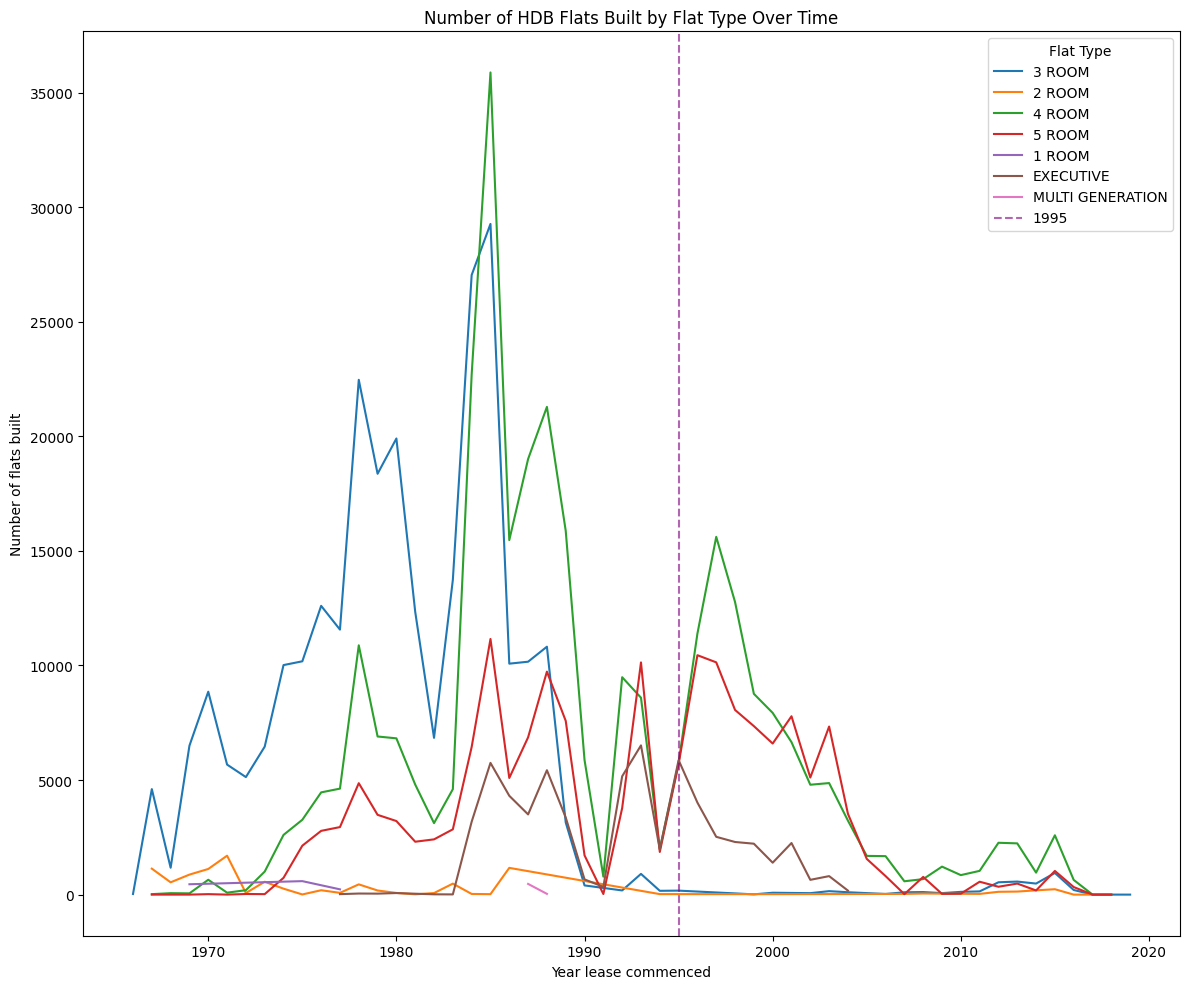

In [44]:
plot_df = (
    df
    .groupby(['lease_commence_date', 'flat_type'])
    .size()
    .reset_index(name='count')
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

sns.lineplot(
    data=plot_df,
    x='lease_commence_date',
    y='count',
    hue='flat_type'
)

plt.axvline(1995, color='purple', linestyle='--', alpha=0.6, label='1995')

plt.xlabel('Year lease commenced')
plt.ylabel('Number of flats built')
plt.title('Number of HDB Flats Built by Flat Type Over Time')

plt.legend(title='Flat Type')
plt.tight_layout()
plt.show()


HDB construction peaked in the late 1970s to late 1980s, driven mainly by large numbers of 3-room and 4-room flats.
After the mid-1990s, overall flat construction declined sharply, with a shift toward fewer and more targeted flat types.
Larger flats such as executive and multi-generation units were built mainly during earlier periods and became much rarer in later years.

### check median flat size over the years

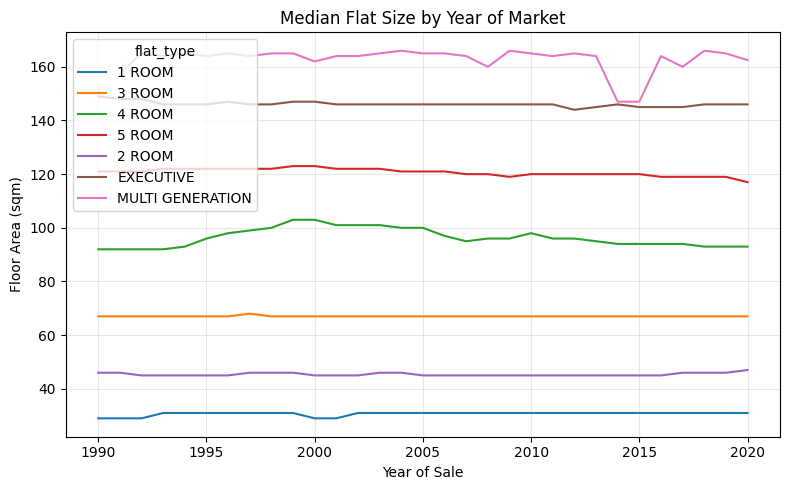

In [45]:
plt.figure(figsize=(8,5))

sns.lineplot(
    data=df,
    x="year",
    y="floor_area_sqm",
    hue="flat_type",
    estimator="median",
    errorbar=None
)

plt.title("Median Flat Size by Year of Market")
plt.xlabel("Year of Sale")
plt.ylabel("Floor Area (sqm)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Flat sizes have not changed much when viewed by year of construction, but they appear to decline when viewed by year of sale.
This happens because older, larger flats were more common in earlier resale transactions, but gradually became less available as owners held on to them.
As a result, newer and slightly smaller flats now make up a larger share of resale sales, meaning buyers increasingly see smaller units on the market and this trend is likely to continue.

### Town vs flat_type composition (stacked proportions)

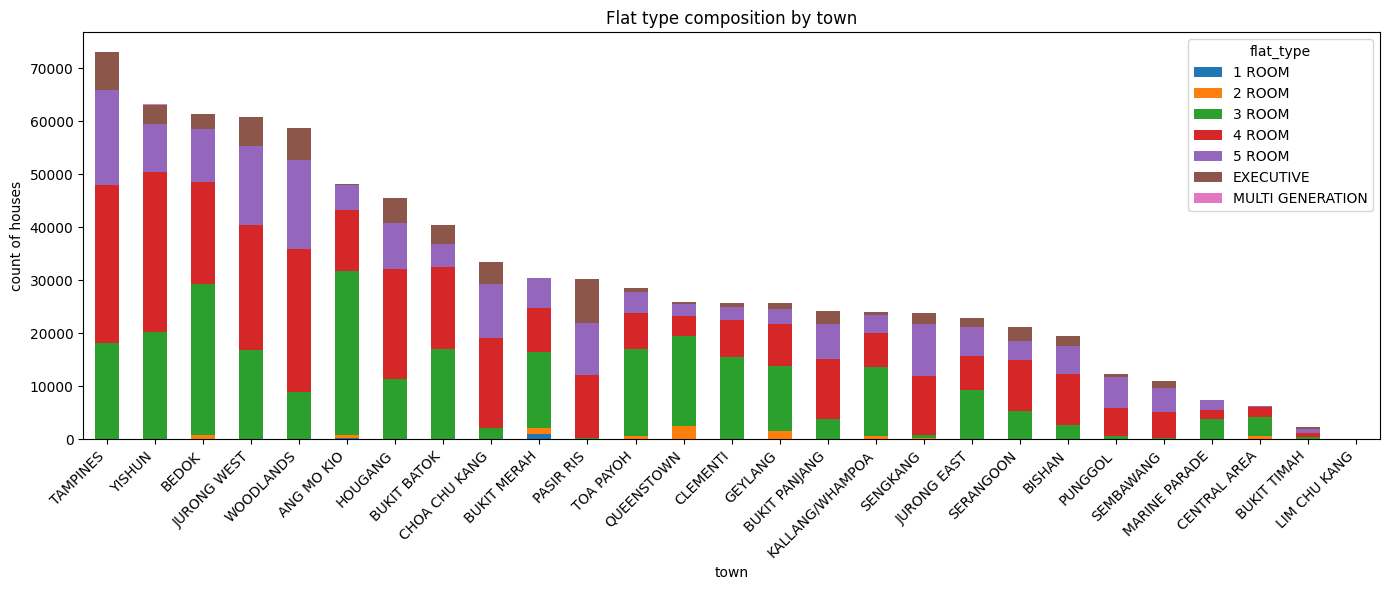

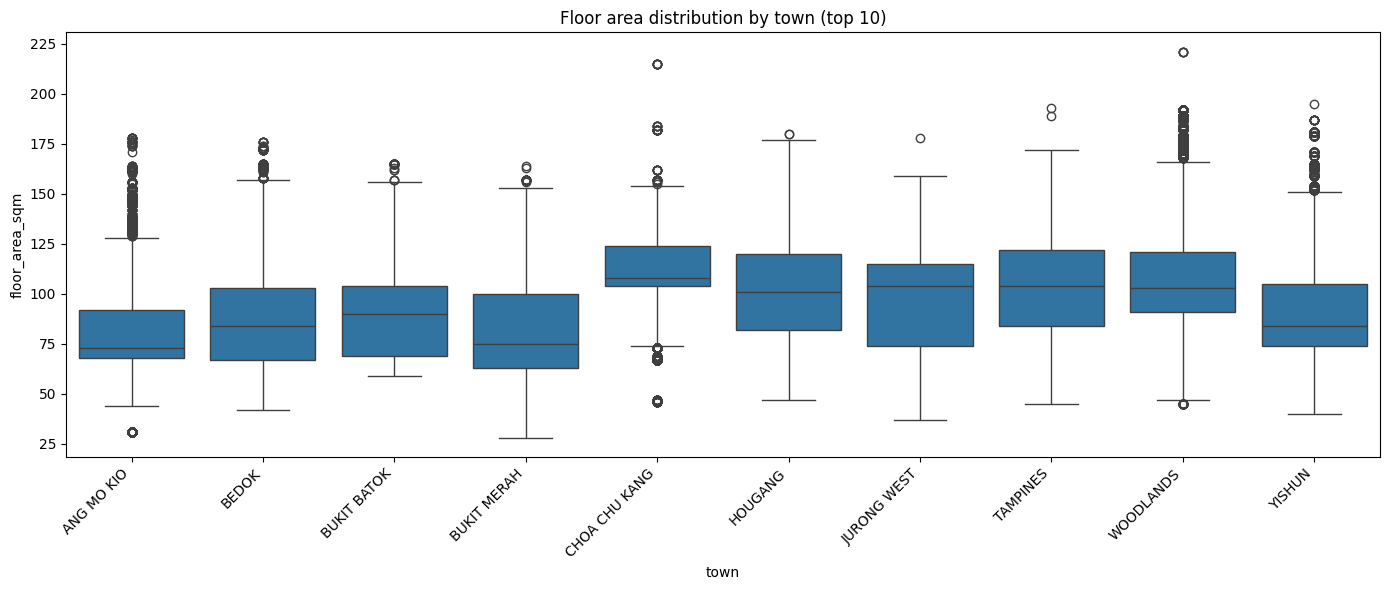

In [46]:

ct = pd.crosstab(df["town"], df["flat_type"])
ct = ct.loc[df["town"].value_counts().head(30).index]  # top 15 towns


ct.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Flat type composition by town")
plt.ylabel("count of houses")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



#(B) Size distribution by town (boxplot)
top_towns = df["town"].value_counts().head(10).index
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df["town"].isin(top_towns)], x="town", y="floor_area_sqm")
plt.xticks(rotation=45, ha="right")
plt.title("Floor area distribution by town (top 10)")
plt.tight_layout()
plt.show()


Different towns have very different flat-type mixes, with larger towns like Tampines, Yishun, and Bedok dominated by 3- and 4-room flats, while central or mature towns have fewer units overall.
Outer towns such as Woodlands, Jurong West, and Choa Chu Kang tend to offer larger average flat sizes, reflecting family-oriented housing supply.
More central and mature estates show smaller median floor areas and less variation, highlighting space constraints and older housing stock.

### Floor area vs adjusted price per sqm

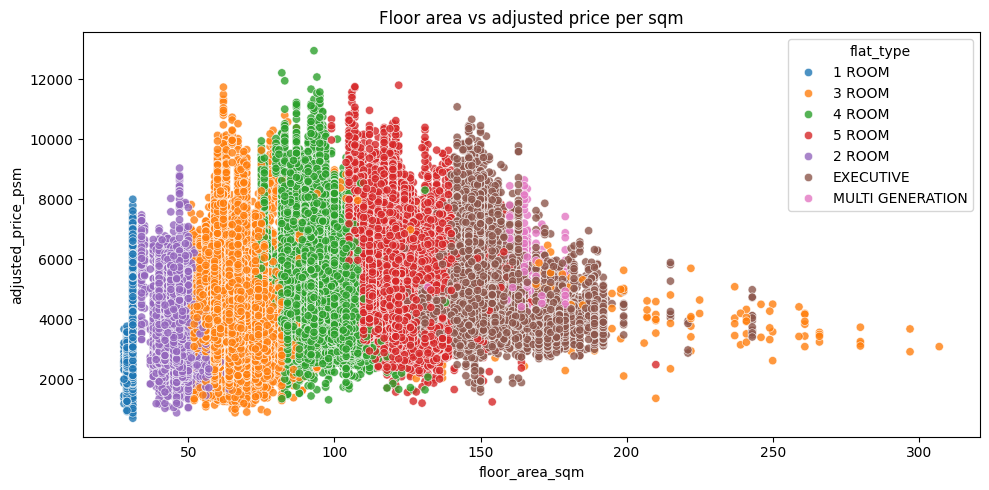

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="floor_area_sqm", y=target, hue="flat_type", alpha=0.8)
plt.title("Floor area vs adjusted price per sqm")
plt.tight_layout()
plt.show()

Adjusted price per sqm varies widely across floor areas, with clear clustering by flat type rather than a simple linear relationship with size.
A small number of very large flats show extreme values, but these appear to be valid observations rather than data errors, reflecting premium or atypical units.

### Price variation within same flat_type among different flat_models


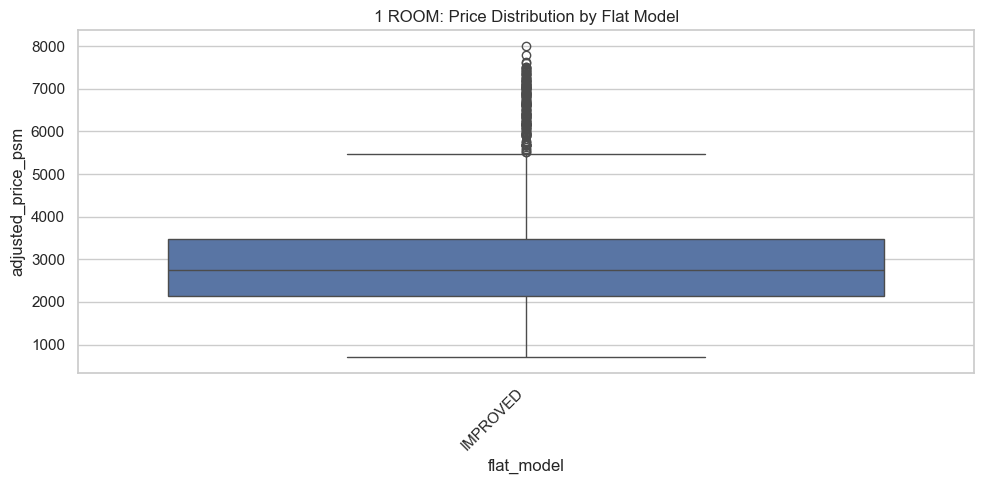

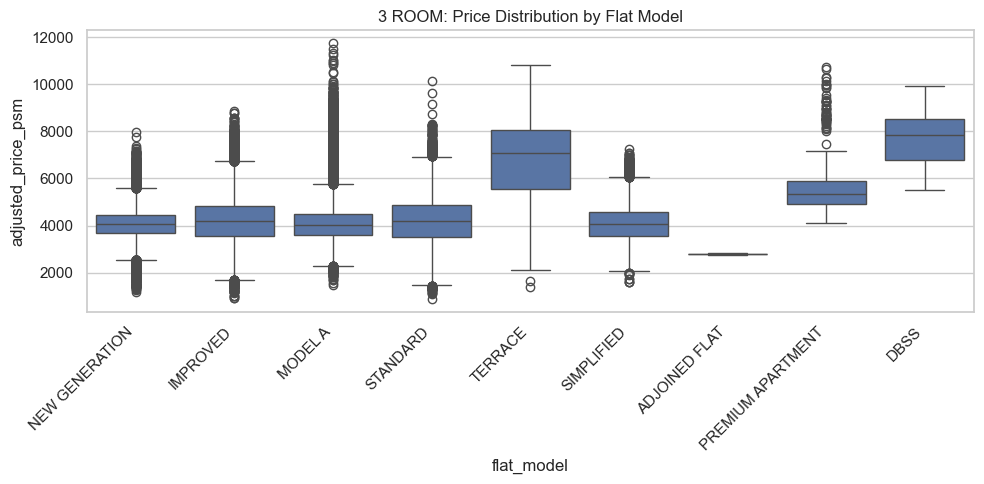

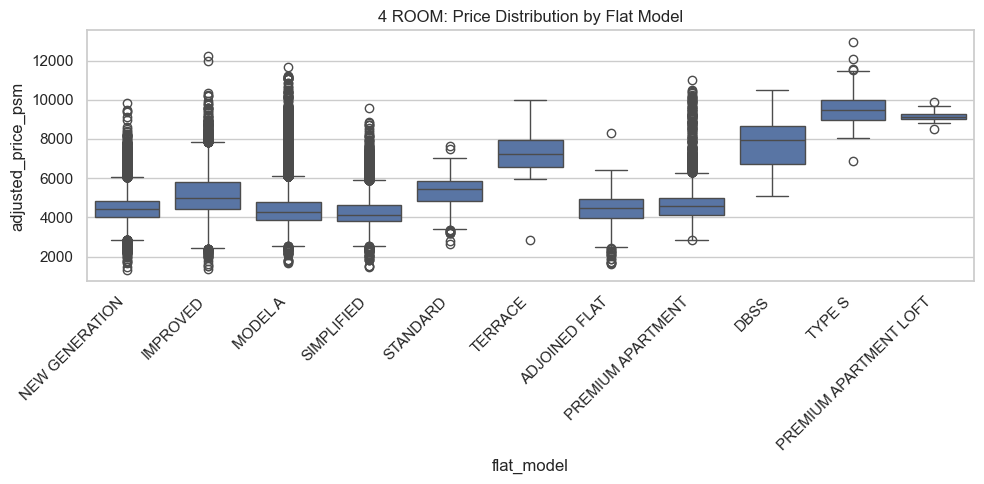

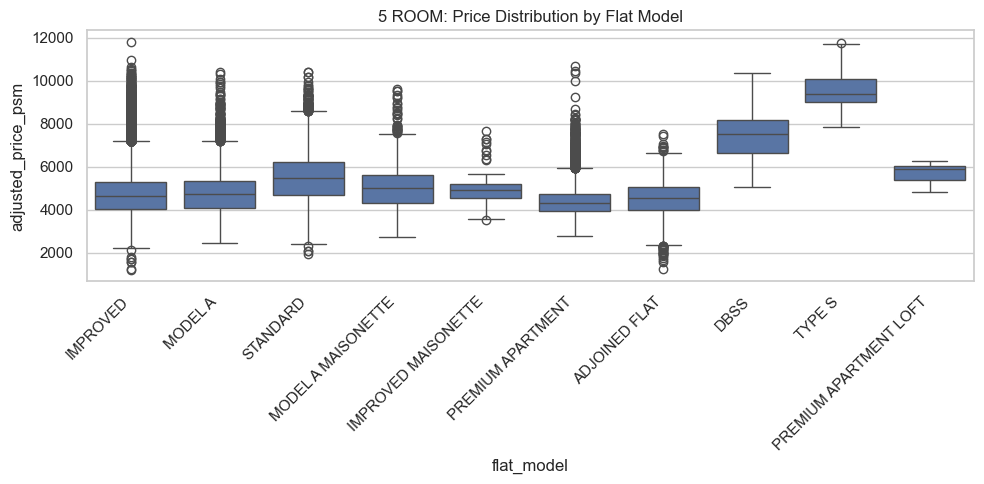

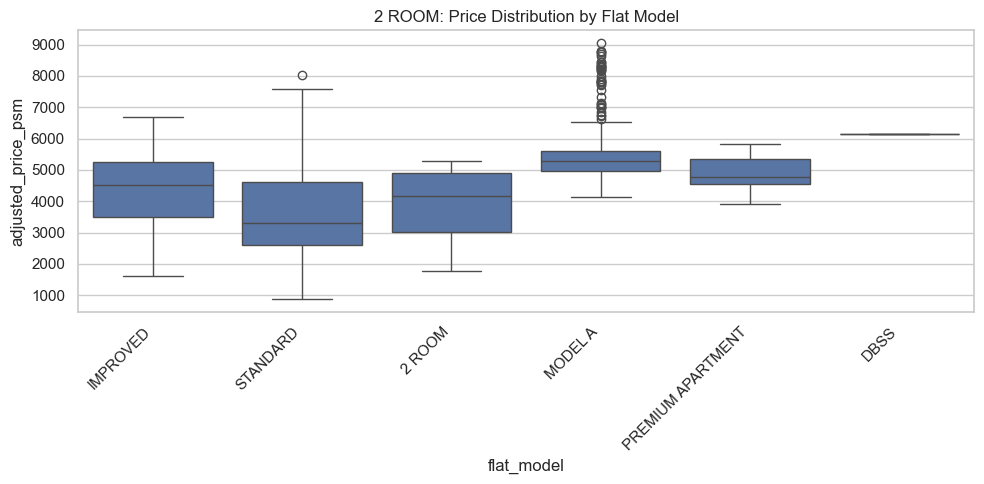

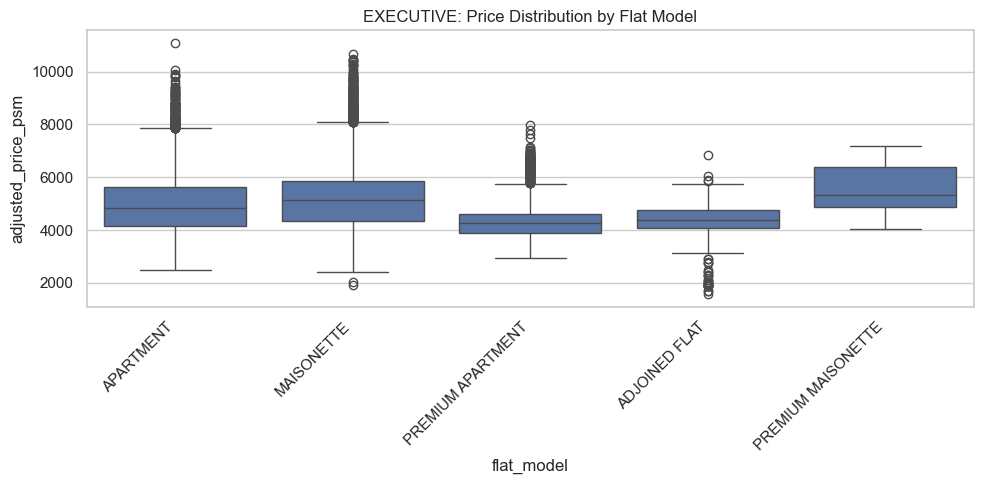

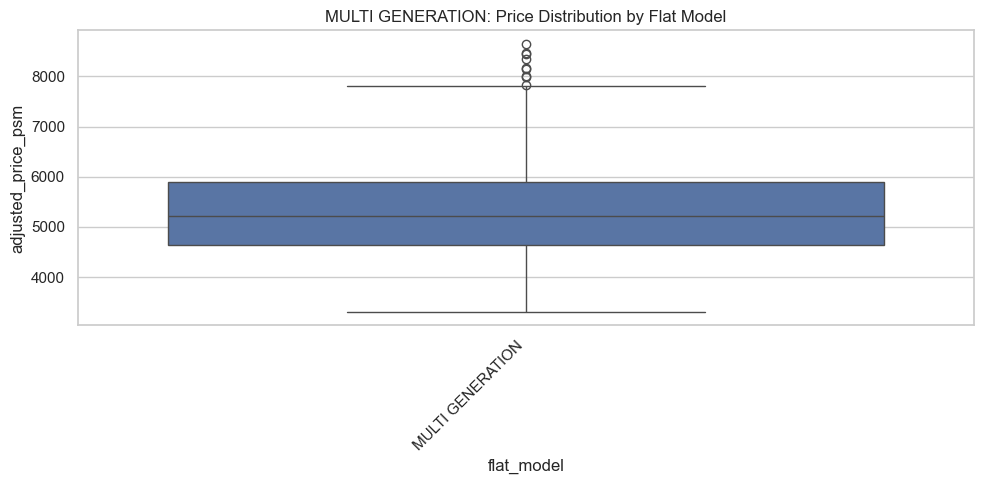

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for ft in df['flat_type'].unique():
    sub = df[df['flat_type'] == ft]

    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=sub,
        x='flat_model',
        y='adjusted_price_psm'
    )
    plt.title(f'{ft}: Price Distribution by Flat Model')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

I first analysed price distributions across flat models within each flat type.
Boxplots and median price comparisons show that certain rare models exhibi.
similar pricing behaviour to their parent categories, while premium and maisonette variants consistently command higher prices.

3-room flats behave almost the same across models (Improved, Model A, New Generation, Simplified, Standard), so they can be safely merged.

4-room flats also show very similar price patterns, with Premium Apartment only slightly higher than the rest.

5-room flats mostly behave alike, including Adjoined Flats, while Premium Apartment is marginally higher but not fundamentally different.

Executive flats (Apartment, Maisonette, Premium) overlap strongly in prices, with Maisonettes showing slightly more variation due to size.

In [ ]:
df.to_csv("data/df_full.csv",index=False)

In [38]:
df = pd.read_csv("data/df_full.csv")
df.columns

Index(['year', 'adjusted_price_psm', 'town', 'flat_type', 'storey_mid',
       'flat_model', 'floor_area_sqm', 'remaining_lease_years',
       'nearest_mrt_dist_km', 'nearest_primary_dist_km',
       'dist_to_city_centre_km'],
      dtype='object')

In [39]:

df = df[['year','adjusted_price_psm','town', 'flat_type', 'storey_mid', 'flat_model', 'floor_area_sqm',
       'remaining_lease_years', 'nearest_mrt_dist_km',
       'nearest_primary_dist_km', 'dist_to_city_centre_km']]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   year                     826581 non-null  int64  
 1   adjusted_price_psm       826581 non-null  float64
 2   town                     826581 non-null  object 
 3   flat_type                826581 non-null  object 
 4   storey_mid               826581 non-null  int64  
 5   flat_model               826581 non-null  object 
 6   floor_area_sqm           826581 non-null  float64
 7   remaining_lease_years    826581 non-null  float64
 8   nearest_mrt_dist_km      816010 non-null  float64
 9   nearest_primary_dist_km  816010 non-null  float64
 10  dist_to_city_centre_km   816010 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 69.4+ MB


In [36]:
df

year  adjusted_price_psm        town  flat_type  storey_mid  \
0       1990         1599.761051  ANG MO KIO     1 ROOM          11   
1       1990         1066.507368  ANG MO KIO     1 ROOM           5   
2       1990         1422.009823  ANG MO KIO     1 ROOM          11   
3       1990         1066.507368  ANG MO KIO     1 ROOM           8   
4       1990         3562.816393  ANG MO KIO     3 ROOM           5   
...      ...                 ...         ...        ...         ...   
826576  2020         3358.778626      YISHUN     5 ROOM           8   
826577  2020         3754.098361      YISHUN     5 ROOM           8   
826578  2020         4016.393443      YISHUN     5 ROOM           5   
826579  2020         3821.917808      YISHUN  EXECUTIVE           5   
826580  2020         3801.369863      YISHUN  EXECUTIVE           5   

            flat_model  floor_area_sqm  remaining_lease_years  \
0             IMPROVED            31.0              86.500000   
1             IMPROVED            31.0              86.500000   
2             IMPROVED            31.0              86.500000   
3             IMPROVED            31.0              86.500000   
4       NEW GENERATION            73.0              85.500000   
...                ...             ...                    ...   
826576        IMPROVED           131.0              66.250000   
826577        IMPROVED           122.0              65.500000   
826578        IMPROVED           122.0              66.333333   
826579      MAISONETTE           146.0              66.250000   
826580      MAISONETTE           146.0              66.750000   

        nearest_mrt_dist_km  nearest_primary_dist_km  dist_to_city_centre_km  
0                  1.251742                 0.397193               10.495038  
1                  1.251742                 0.397193               10.495038  
2                  1.251742                 0.397193               10.495038  
3                  1.251742                 0.397193               10.495038  
4                  0.986904                 0.405152                9.192749  
...                     ...                      ...                     ...  
826576             0.887593                 0.344245               16.018368  
826577             0.478352                 0.331144               15.889989  
826578             0.257345                 0.445030               14.702325  
826579             0.354754                 0.513539               15.296260  
826580             1.364421                 0.246785               16.176765  

[826581 rows x 11 columns]

### Correlation heatmap

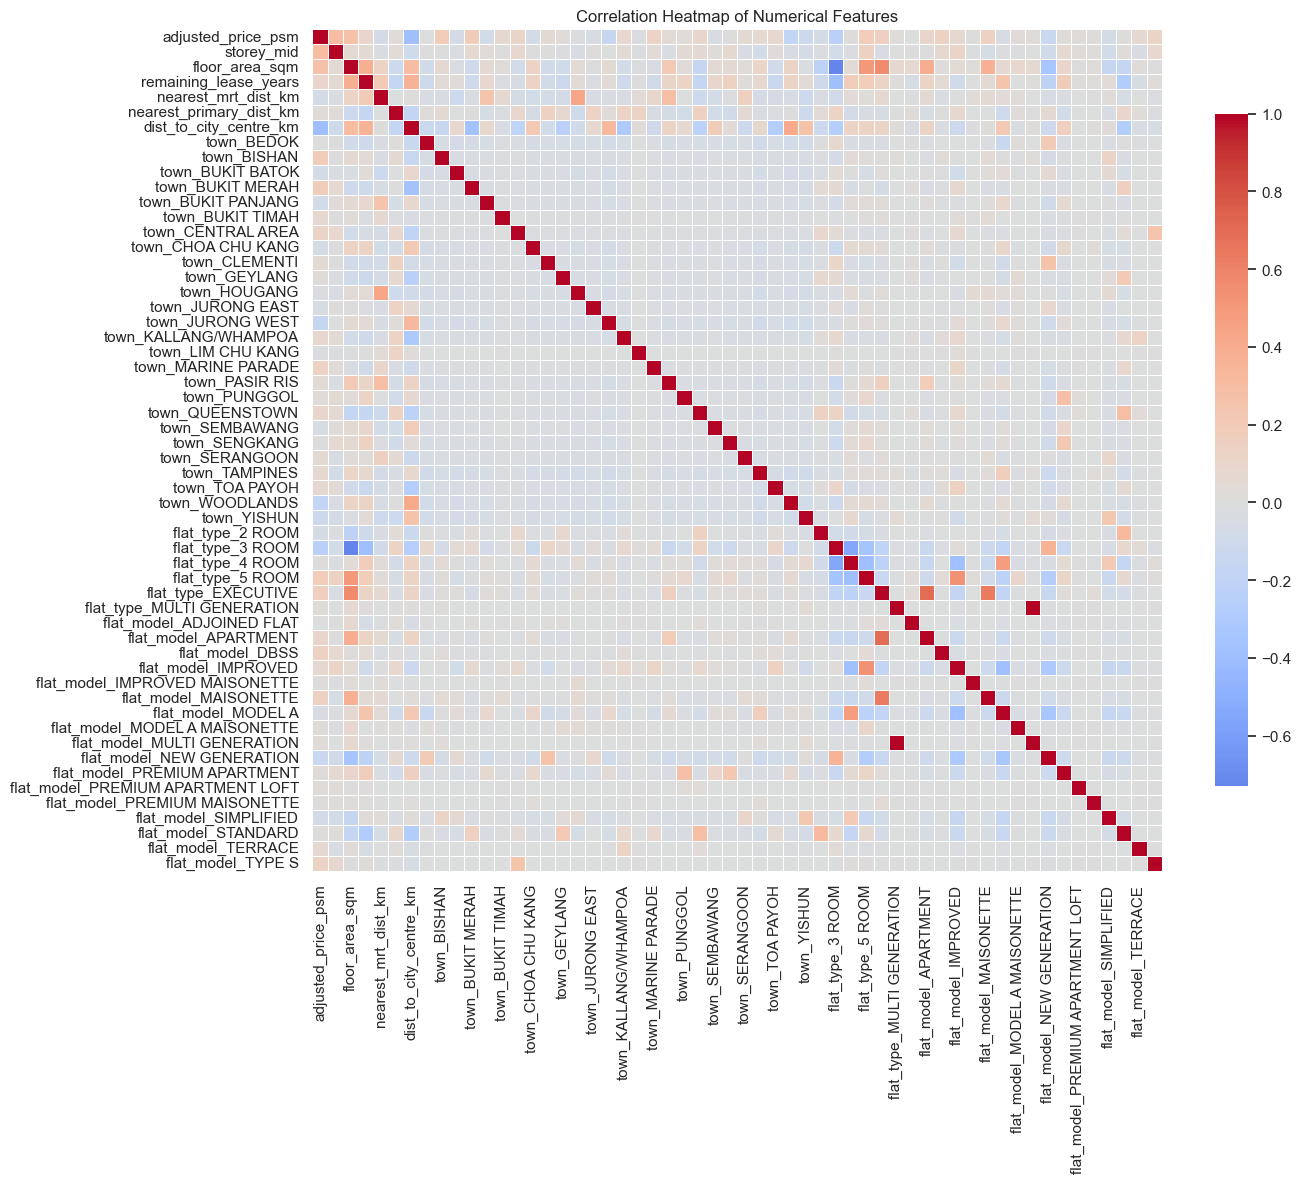

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

#one hot the categorical features to plot the correlation
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_df = df.select_dtypes(include="number")

cat_df = pd.get_dummies(df[cat_cols], drop_first=True)
corr_df = pd.concat([num_df, cat_df], axis=1)

corr_df = corr_df.drop(columns=["year"])
    
corr = corr_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,      
    fmt=".2f",         
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Modeling

## Base model  Ridge model

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("data/df_full.csv")
df.columns
df = df[['year','adjusted_price_psm','town', 'flat_type', 'storey_mid', 'flat_model', 'floor_area_sqm',
       'remaining_lease_years', 'nearest_mrt_dist_km',
       'nearest_primary_dist_km', 'dist_to_city_centre_km']]


df = df.copy()

num_features = [
    "floor_area_sqm",
    "storey_mid",
    "remaining_lease_years",
    "nearest_mrt_dist_km",
    "nearest_primary_dist_km",
    "dist_to_city_centre_km"
]

cat_features = ["town", "flat_type", "flat_model"]

train_df = df[df["year"] < 2015]
test_df  = df[(df["year"] >= 2015) & (df["year"] <= 2020)]

X_train = train_df[num_features + cat_features]
y_train = train_df["adjusted_price_psm"]

X_test  = test_df[num_features + cat_features]
y_test  = test_df["adjusted_price_psm"]

#Preprocessing + Ridge model
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

ridge_model = Ridge(alpha=10.0, random_state=42)

linear_pipeline = Pipeline(
    steps=[
        ("prep", preprocess),
        ("ridge", ridge_model)
    ]
)

linear_pipeline.fit(X_train, y_train)

#Evaluation
def eval_metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),
        "R2": r2_score(y_true, y_pred)
    }

pred_train = linear_pipeline.predict(X_train)
pred_test  = linear_pipeline.predict(X_test)

metrics = pd.DataFrame([
    {"Split": "Train", **eval_metrics(y_train, pred_train)},
    {"Split": "Test",  **eval_metrics(y_test, pred_test)}
])

metrics

C:\Users\Jiany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Jiany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Split         MAE        RMSE        R2
0  Train  501.086131  664.874833  0.489962
1   Test  667.952630  864.451478  0.460899

## Predicted vs Actual plot and coefficient

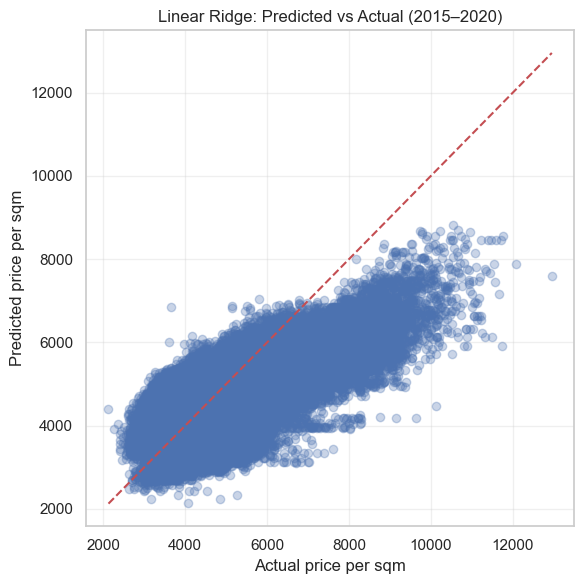

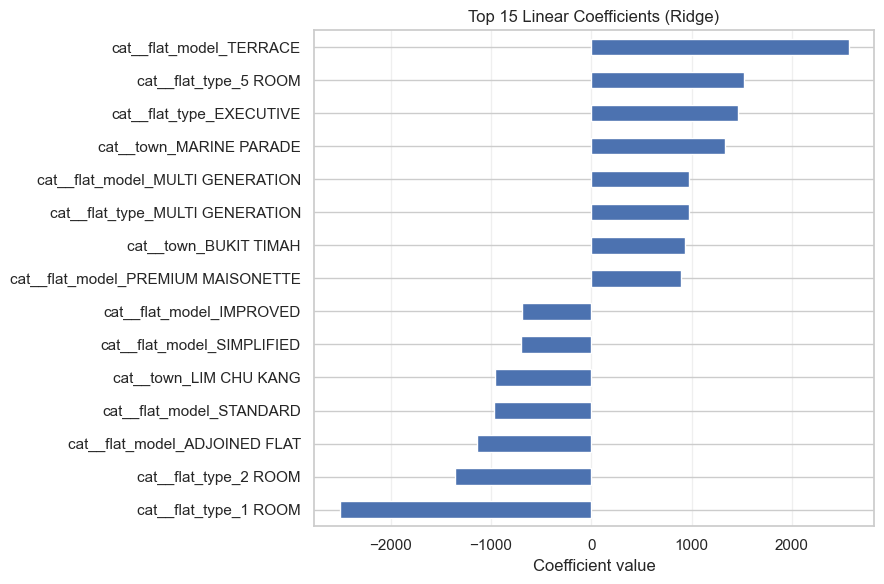

In [57]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_test, alpha=0.3)

min_v = min(y_test.min(), pred_test.min())
max_v = max(y_test.max(), pred_test.max())
plt.plot([min_v, max_v], [min_v, max_v], "r--")

plt.xlabel("Actual price per sqm")
plt.ylabel("Predicted price per sqm")
plt.title("Linear Ridge: Predicted vs Actual (2015–2020)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Linear feature importance (coefficients)

feature_names = linear_pipeline.named_steps["prep"].get_feature_names_out()
coefs = linear_pipeline.named_steps["ridge"].coef_

coef_df = (
    pd.Series(coefs, index=feature_names)
    .sort_values(key=np.abs, ascending=False)
)

coef_df.head(15)
#Plot top 15 coefficients

coef_df.head(15).sort_values().plot(
    kind="barh",
    figsize=(9,6)
)
plt.title("Top 15 Linear Coefficients (Ridge)")
plt.xlabel("Coefficient value")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

## Xgb + TimeSeriesSplit + RandomSearch

### Use data before 2015 as train, 2015-2020 as test data

## Without Hyperparameter tuning


In [58]:

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
df = pd.read_csv("data/df_full.csv")
df.columns
df = df[['year','adjusted_price_psm','town', 'flat_type', 'storey_mid', 'flat_model', 'floor_area_sqm',
       'remaining_lease_years', 'nearest_mrt_dist_km',
       'nearest_primary_dist_km', 'dist_to_city_centre_km']]


df = df.copy()

num_features = [
    "floor_area_sqm",
    "storey_mid",
    "remaining_lease_years",
    "nearest_mrt_dist_km",
    "nearest_primary_dist_km",
    "dist_to_city_centre_km"
]

cat_features = ["town", "flat_type", "flat_model"]

train_df = df[df["year"] < 2015]
test_df  = df[(df["year"] >= 2015) & (df["year"] <= 2020)]

X_train = train_df[num_features + cat_features]
y_train = train_df["adjusted_price_psm"]

X_test  = test_df[num_features + cat_features]
y_test  = test_df["adjusted_price_psm"]
#preprocessing

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

# model
xgb = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=2000,          # big, rely on early stopping
    learning_rate=0.03,         # smaller lr
    max_depth=5,                # smaller tree
    min_child_weight=10,        # stronger constraint
    gamma=1.0,                  # discourage splits
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=2.0,
    random_state=42,
    n_jobs=-1
)



pipeline = Pipeline(
    steps=[
        ("prep", preprocess),
        ("xgb", xgb)
    ]
)

param_dist = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__learning_rate": [0.02, 0.03, 0.05],

    "xgb__max_depth": [3, 4, 5, 6],
    "xgb__min_child_weight": [5, 10, 20],
    "xgb__gamma": [0, 0.5, 1, 2],

    "xgb__subsample": [0.6, 0.7, 0.8],
    "xgb__colsample_bytree": [0.6, 0.7, 0.8],

    "xgb__reg_alpha": [0, 0.01, 0.1, 1.0],
    "xgb__reg_lambda": [1, 2, 5, 10],
}


param_dist = {
    "xgb__n_estimators": [100],
    #"xgb__max_depth": [6, 8, 10],
    #"xgb__learning_rate": [0.03, 0.05, 0.1],
    #"xgb__subsample": [0.7, 0.9],
    #"xgb__colsample_bytree": [0.7, 0.9]
}



tscv = TimeSeriesSplit(n_splits=3)

rs = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=1,
    cv=tscv,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs.fit(X_train, y_train)

best_model = rs.best_estimator_


def eval_metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),
        "R2": r2_score(y_true, y_pred)
    }

pred_train = best_model.predict(X_train)
pred_test  = best_model.predict(X_test)

metrics = pd.DataFrame([
    {"Split": "Train", **eval_metrics(y_train, pred_train)},
    {"Split": "Test",  **eval_metrics(y_test, pred_test)}
])

metrics

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\Jiany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Jiany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Split         MAE        RMSE        R2
0  Train  407.904909  548.720493  0.652604
1   Test  563.338917  798.761355  0.539719

## Xgb hyperparameter tuning

In [59]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor

df = pd.read_csv("data/df_full.csv")
df.columns
df = df[['year','adjusted_price_psm','town', 'flat_type', 'storey_mid', 'flat_model', 'floor_area_sqm',
       'remaining_lease_years', 'nearest_mrt_dist_km',
       'nearest_primary_dist_km', 'dist_to_city_centre_km']]


df = df.copy()

num_features = [
    "floor_area_sqm",
    "storey_mid",
    "remaining_lease_years",
    "nearest_mrt_dist_km",
    "nearest_primary_dist_km",
    "dist_to_city_centre_km"
]

cat_features = ["town", "flat_type", "flat_model"]

train_df = df[df["year"] < 2015]
test_df  = df[(df["year"] >= 2015) & (df["year"] <= 2020)]

X_train = train_df[num_features + cat_features]
y_train = train_df["adjusted_price_psm"]

X_test  = test_df[num_features + cat_features]
y_test  = test_df["adjusted_price_psm"]
#preprocessing

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

# model
xgb = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=2000,          # big, rely on early stopping
    learning_rate=0.03,         # smaller lr
    max_depth=5,                # smaller tree
    min_child_weight=10,        # stronger constraint
    gamma=1.0,                  # discourage splits
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=2.0,
    random_state=42,
    n_jobs=-1
)



pipeline = Pipeline(
    steps=[
        ("prep", preprocess),
        ("xgb", xgb)
    ]
)


param_dist = {
    "xgb__n_estimators": [100],
    #"xgb__max_depth": [6, 8, 10],
    #"xgb__learning_rate": [0.03, 0.05, 0.1],
    #"xgb__subsample": [0.7, 0.9],
    #"xgb__colsample_bytree": [0.7, 0.9]
}



param_dist = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__learning_rate": [0.02, 0.03, 0.05],

    "xgb__max_depth": [4, 6, 8, 10, 12],
    "xgb__min_child_weight": [5, 10, 20],
    "xgb__gamma": [0, 0.5, 1, 2],

    "xgb__subsample": [0.6, 0.7, 0.8],
    "xgb__colsample_bytree": [0.6, 0.7, 0.8],

    "xgb__reg_alpha": [0, 0.01, 0.1, 1.0],
    "xgb__reg_lambda": [1, 2, 5, 10],
}

tscv = TimeSeriesSplit(n_splits=3)

rs = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=tscv,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs.fit(X_train, y_train)

best_model = rs.best_estimator_


def eval_metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),
        "R2": r2_score(y_true, y_pred)
    }

pred_train = best_model.predict(X_train)
pred_test  = best_model.predict(X_test)

metrics = pd.DataFrame([
    {"Split": "Train", **eval_metrics(y_train, pred_train)},
    {"Split": "Test",  **eval_metrics(y_test, pred_test)}
])

metrics

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Jiany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Jiany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Split         MAE        RMSE        R2
0  Train  237.970747  338.486206  0.867808
1   Test  441.510661  634.608728  0.709463

In [60]:
best_parameters = rs.best_params_
print(best_parameters)

{'xgb__subsample': 0.7, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 200, 'xgb__min_child_weight': 10, 'xgb__max_depth': 12, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.6}


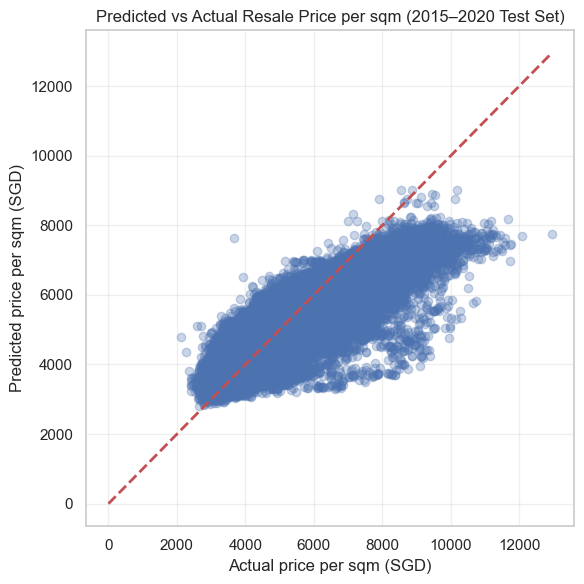

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions already in original price scale (no log used)
y_true = y_test
y_pred = pred_test

plt.figure(figsize=(6,6))

plt.scatter(
    y_true,
    y_pred,
    alpha=0.3
)

max_val = max(y_true.max(), y_pred.max())
plt.plot(
    [0, max_val],
    [0, max_val],
    "r--",
    linewidth=2
)

plt.xlabel("Actual price per sqm (SGD)")
plt.ylabel("Predicted price per sqm (SGD)")
plt.title("Predicted vs Actual Resale Price per sqm (2015–2020 Test Set)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Plotting the prediction and feature importances

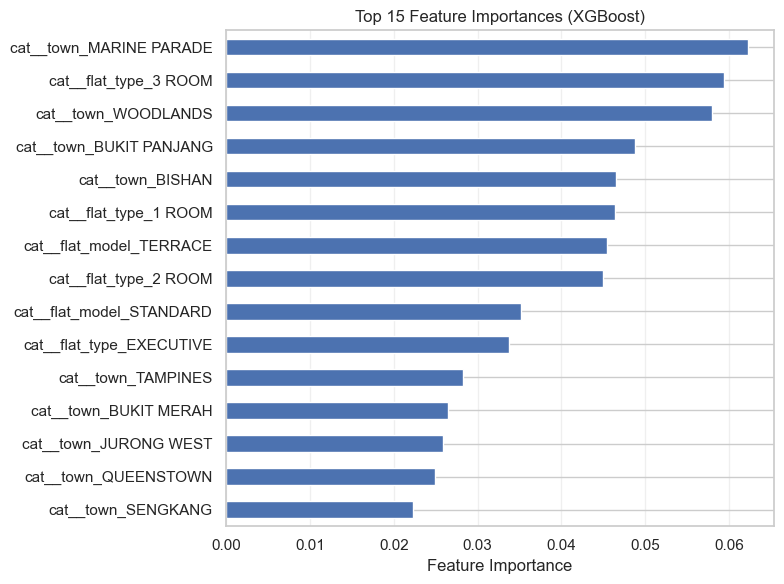

In [91]:
# Get feature names after preprocessing
feature_names = (
    best_model.named_steps["prep"]
    .get_feature_names_out()
)
import pandas as pd

importances = pd.Series(
    best_model.named_steps["xgb"].feature_importances_,
    index=feature_names
).sort_values(ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

importances.head(15).plot(
    kind="barh"
)

plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances (XGBoost)")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

# Model Prediction Task I
### Objective

The objective is to build a predictive algorithm to identify key factors affecting residential property prices in Singapore, and to derive insights that can inform strategies for curbing housing price inflation. The model must be reproducible by colleagues on standard local machines without GPU access.

### Data Preparation and Feature Selection
Based on exploratory data analysis (EDA), the following groups of variables were found to be most relevant:

#### Structual attributes 
* Floor area (sqm)

* Flat type (e.g. 3-room, 4-room, Executive)

* Flat model (proxy for design era and layout)

* Storey level

* Remaining lease years

#### Location attributes

* Town 

* Distance to city centre

* Distance to nearest MRT station

* Distance to nearest primary school

* Price normalisation : Prices were inflation-adjusted and expressed as price per square metre to remove macro-inflation effects and isolate structural drivers.

These features were chosen because:

They are interpretable and policy-relevant.

They are available historically and can be maintained over time.

They capture both supply-side (flat design, size) and demand-side (location accessibility) factors.

### Modelling Approach and Justification
#### Model choice

Two models were used:

* Linear baseline model (Ridge Regression) – for interpretability and benchmarking.

* Tree-based model (XGBoost) – for capturing non-linear relationships and interactions.

XGBoost was selected as the primary model because:

* It performs well on tabular data.

* It runs efficiently on CPUs.

* It handles mixed numerical and categorical features effectively.

* It provides feature importance for interpretation.

#### Reproducibility

* A scikit-learn Pipeline was used to combine preprocessing and modelling.

* Missing values were handled using simple imputation (median for numeric, mode for categorical).

* Categorical variables were encoded using One-Hot Encoding.

* All random seeds were fixed to ensure reproducibility.

* No GPU-specific libraries were used.

* This ensures that colleagues can reproduce results on standard laptops.

#### Model Evaluation

A time-based split was used:

* Training data: transactions before 2015

* Test data: transactions from 2015–2020

This avoids data leakage and reflects real-world forecasting.

##### Performance (XGBoost)

Test MAE ≈ 440 SGD per sqm

Test R² ≈ 0.70

This indicates good predictive performance for a housing dataset with strong spatial heterogeneity.

#### Key Insights from the Model

###### Feature importance analysis shows:

* Town is the strongest driver of prices

* Location effects dominate all other variables.

* Even after controlling for flat size and type, large town-level price differences remain.

* Flat type and flat model are major contributors

* Larger and rarer flat types (e.g. Executive) command significant premiums.

* Certain flat models associated with older or premium designs retain higher value.

* Accessibility variables have secondary effects

* Distance to city centre, MRT, and schools do matter.

* However, once town is controlled for, their marginal impact is smaller.

* This suggests accessibility is largely capitalised into location itself.

#### Policy Implications and Strategies to Curb Price Inflation

Based on the findings, the following strategies can be considered:

##### Location-based supply intervention

* Since town-level effects dominate prices, increasing housing supply in high-demand towns (e.g. central or mature estates) can directly reduce upward price pressure.

##### Flat type mix management

* A higher proportion of large or premium flat types is associated with higher resale prices.

* Regulating the distribution of flat types in new developments can moderate price escalation.

##### Design standardisation

* Certain flat models command systematic premiums.

* Standardising layouts and limiting overly differentiated designs can reduce speculative pricing.

##### Targeted infrastructure planning

* New MRT lines do raise accessibility, but their price effects are uneven and already anticipated by the market.

* Infrastructure investments should be paired with concurrent housing supply to avoid capitalisation into prices.

# Model Prediction Task II

#### Considerations in Building an In-House Predictive Model

#### Building an in-house housing price model requires balancing accuracy, interpretability, scalability, and governance.

Key Considerations
#### 1. Interpretability vs. Complexity

Policy users require explanations, not just predictions.
Models must:

* Clearly explain why prices are high.

* Allow attribution to factors such as location, flat type, and lease.

This is why:

* Tree-based models with feature importance are preferred over black-box deep learning.

* Simple baselines are maintained alongside more complex models.

#### 2. Data Governance and Maintenance

An in-house model must rely on:

* Stable data sources (HDB transactions, MRT locations, school locations).

* Features that can be consistently updated.

* Highly manual or externally dependent data (e.g. speculative sentiment indicators) should be avoided.

#### 3. Temporal Robustness

* Housing markets evolve over time due to:

* Policy changes

* Infrastructure rollouts

* Demographic shifts

Therefore:

* Time-based validation is essential.

* Models should be retrained periodically.

* Feature drift should be monitored.

#### 4. Computational Constraints

* Since users do not have GPU access:

* CPU-efficient algorithms are required.

* Training time must be reasonable.

* Pipelines must run end-to-end on standard machines.

This justifies the use of:

* Scikit-learn pipelines

* Gradient boosting on CPU

* Avoidance of deep neural networks

#### 5. Responsible Use in Policy Context

Predictions should not be used in isolation.
They should support:

* Scenario analysis

* Policy stress testing

* Communication with the public

Importantly:

* Models should inform policy, not replace judgement.

#### Conclusion

* An effective in-house predictive model for housing prices should prioritise:

* Strong baseline performance

* Transparency

* Reproducibility

* Policy relevance

The modelling approach described balances these needs and provides actionable insights into the structural drivers of housing price inflation in Singapore.